In [1]:
if(! require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("fgsea")
BiocManager::install("msigdbr")
if (!requireNamespace("AnnotationDbi", quietly = TRUE)) {
  BiocManager::install("AnnotationDbi")
}
if (!requireNamespace("org.Hs.eg.db", quietly = TRUE)) {
  BiocManager::install("org.Hs.eg.db")
}
BiocManager::install("clusterProfiler", force = TRUE)
install.packages("msigdbdf", repos = "https://igordot.r-universe.dev")
install.packages("pheatmap")

library(tidyverse)
library(fgsea)
library(AnnotationDbi)
library(org.Hs.eg.db)
library(stringr)
library(ggplot2)
library(msigdbr)
library(clusterProfiler)
library(tibble)
library(dplyr)
library(pheatmap)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)

Installing package(s) 'BiocVersion', 'fgsea'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘BiocParallel’, ‘cowplot’, ‘fastmatch’, ‘BH’


Old packages: 'pkgdown'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)

Installing package(s) 'msigdbr'

also installing the dependencies ‘assertthat’, ‘babelgene’


Old packages: 'pkgdown'

'getOption("repos")' replaces Bioconductor standard r

Extracting the chemical name to try and make processing easier

In [2]:
cat("Enter a chemical name: ")
x <- readline()
control_files <- list()
con_lis <- list("0.0005", "0.001", "0.01", "0.1", "0.5", "1", "5", "10", "50", "100")
for (i in con_lis){
  control_files[[paste0(x, i)]] = paste0("log2foldsorted_file_", x, i, ".csv")
}
print(control_files)

Enter a chemical name: BPAP
$BPAP0.0005
[1] "log2foldsorted_file_BPAP0.0005.csv"

$BPAP0.001
[1] "log2foldsorted_file_BPAP0.001.csv"

$BPAP0.01
[1] "log2foldsorted_file_BPAP0.01.csv"

$BPAP0.1
[1] "log2foldsorted_file_BPAP0.1.csv"

$BPAP0.5
[1] "log2foldsorted_file_BPAP0.5.csv"

$BPAP1
[1] "log2foldsorted_file_BPAP1.csv"

$BPAP5
[1] "log2foldsorted_file_BPAP5.csv"

$BPAP10
[1] "log2foldsorted_file_BPAP10.csv"

$BPAP50
[1] "log2foldsorted_file_BPAP50.csv"

$BPAP100
[1] "log2foldsorted_file_BPAP100.csv"



In [3]:
# this method genes the gene pathways and genes associated to the subcomponent and then converts it into a dictionary of lists like structure
get_pathway_genes <- function(subcat){
  data <- msigdbr(species = "Homo sapiens", category = "C5", subcategory = subcat)
  subgroups <- split(data$gene_symbol, data$gs_name)
  return(subgroups)
}
# this methods is just converting the ensemble IDs from featureCounts to gene symbols and only keeping the stat and gene name column
get_stats <- function(x){
  data <- read.csv(x)
  data$gene <- gsub("\\..*", "", data$gene)
  data$gene_symbol <- mapIds(org.Hs.eg.db,
                             keys = data$gene,
                             column = "SYMBOL",
                             keytype = "ENSEMBL",
                             multiVals = "first")
  data <- na.omit(data)
  data <- data[!duplicated(data$gene_symbol), ]
  rel_cols <- data[, c("gene_symbol", "stat")]
  return(deframe(rel_cols))
}
subcategories <- c("GO:BP", "GO:CC", "GO:MF")

In [4]:
my_stats <- get_stats(control_files[[paste0(x, 100)]])
pathway_genes <- get_pathway_genes("GO:BP")

cat("Genes in stats:", length(my_stats), "\n")
cat("Unique genes in pathways:", length(unique(unlist(pathway_genes))), "\n") # confirming the whole package is installed
cat("Common genes:", length(intersect(names(my_stats), unique(unlist(pathway_genes)))), "\n")

'select()' returned 1:many mapping between keys and columns

Warning message:
“The `category` argument of `msigdbr()` is deprecated as of msigdbr 10.0.0.
ℹ Please use the `collection` argument instead.”
Warning message:
“The `subcategory` argument of `msigdbr()` is deprecated as of msigdbr 10.0.0.
ℹ Please use the `subcollection` argument instead.”


Genes in stats: 8604 
Unique genes in pathways: 17951 
Common genes: 7605 


'select()' returned 1:many mapping between keys and columns

Saving 7 x 7 in image


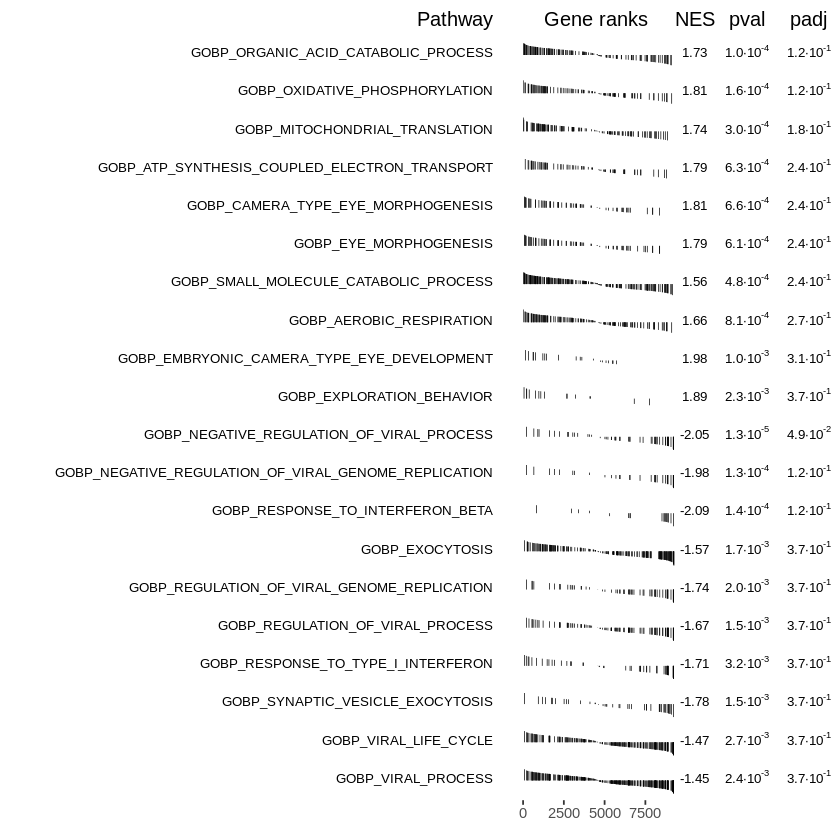

Saving 7 x 7 in image


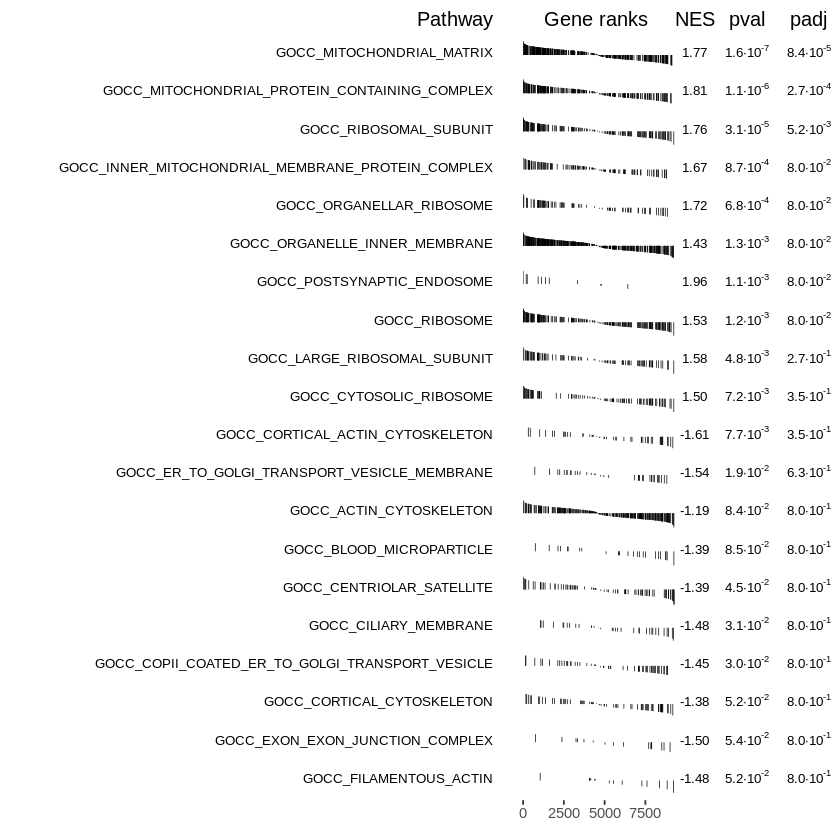

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



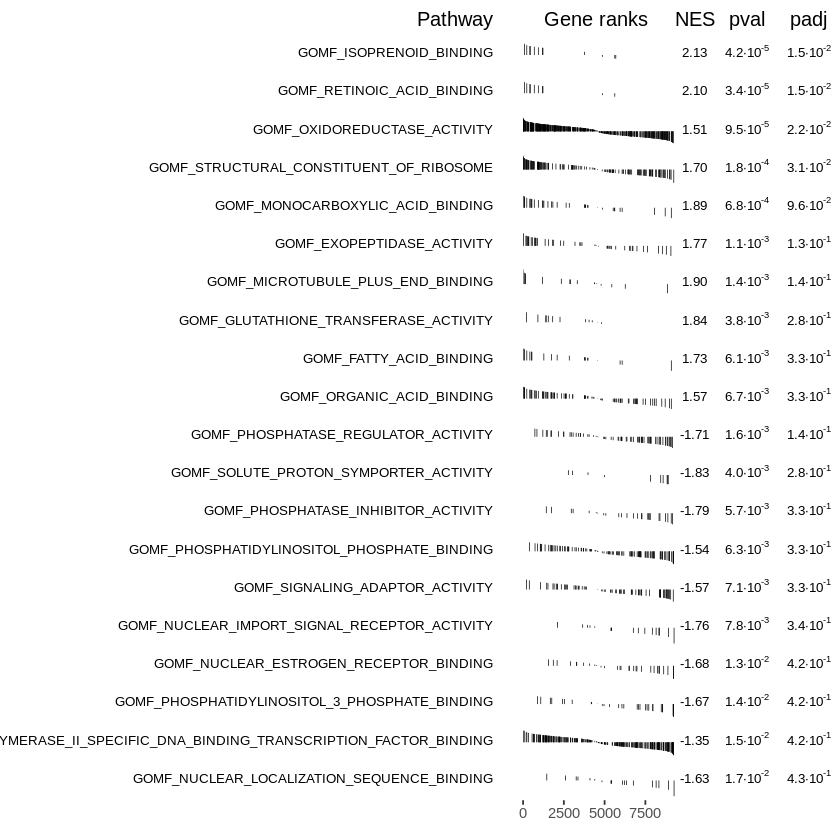

Saving 7 x 7 in image


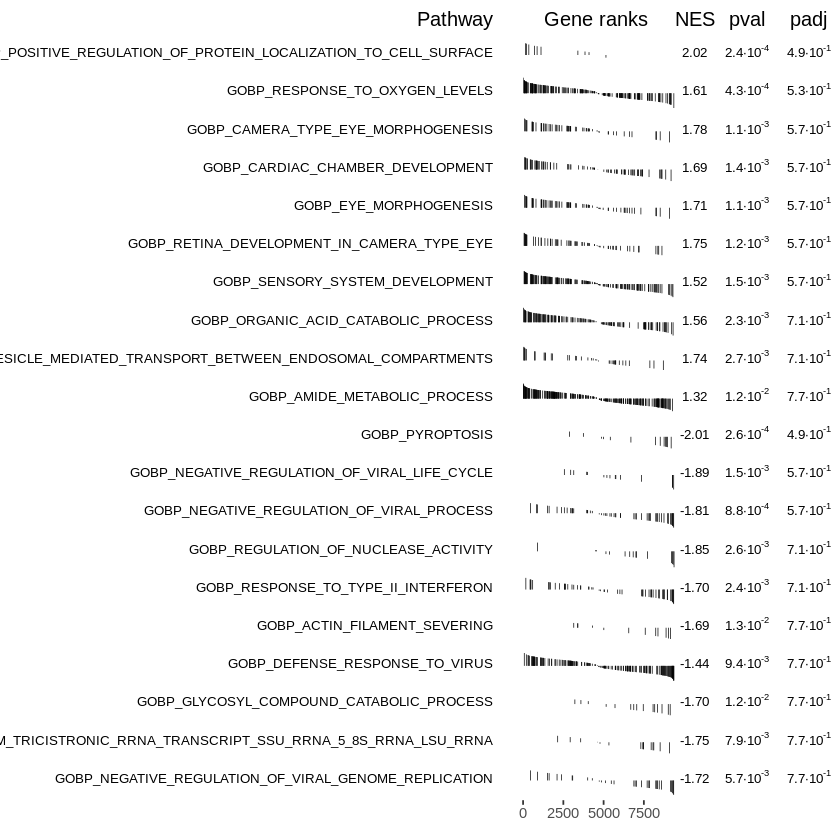

Saving 7 x 7 in image


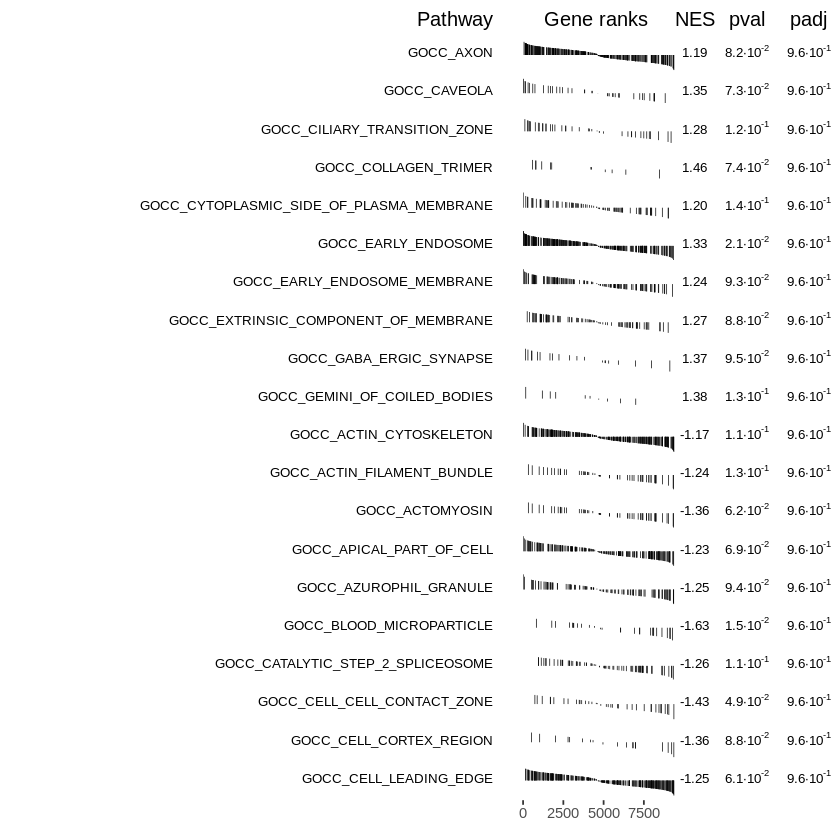

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



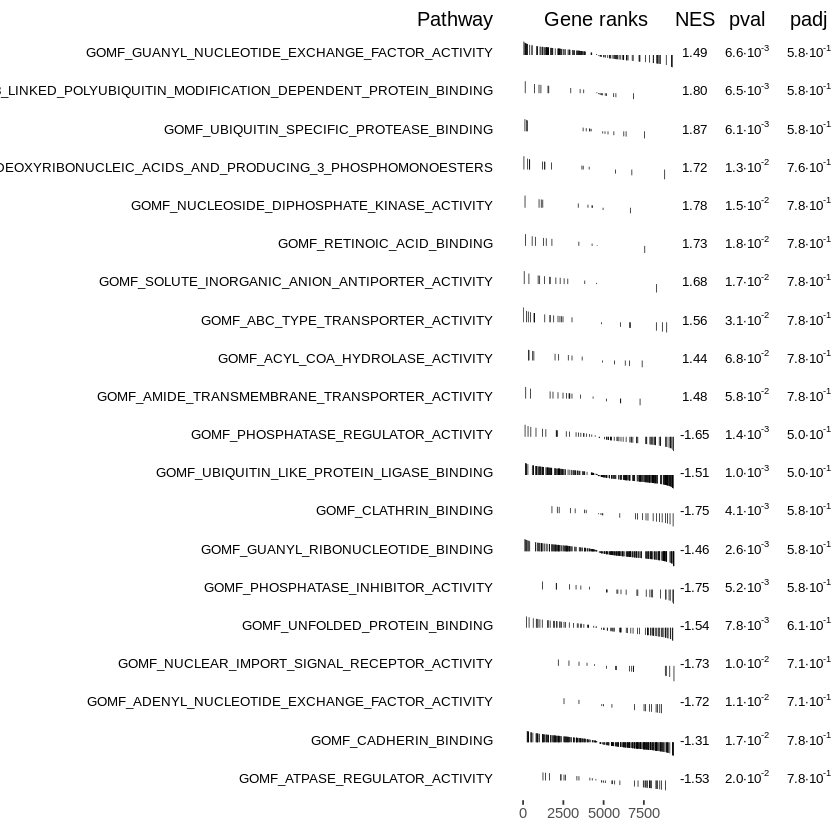

Saving 7 x 7 in image


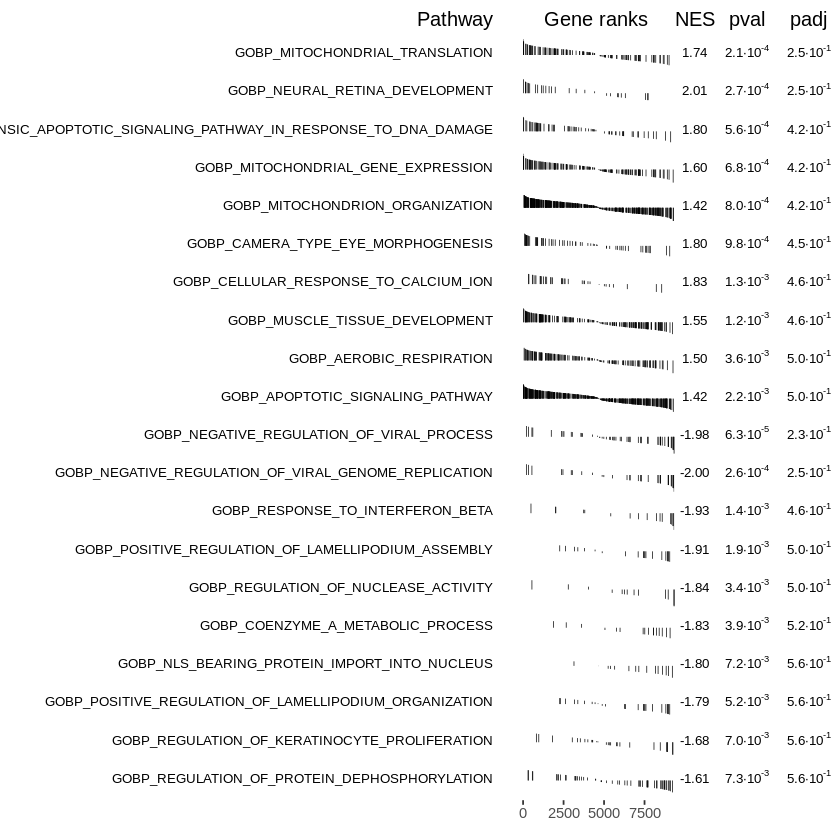

Saving 7 x 7 in image


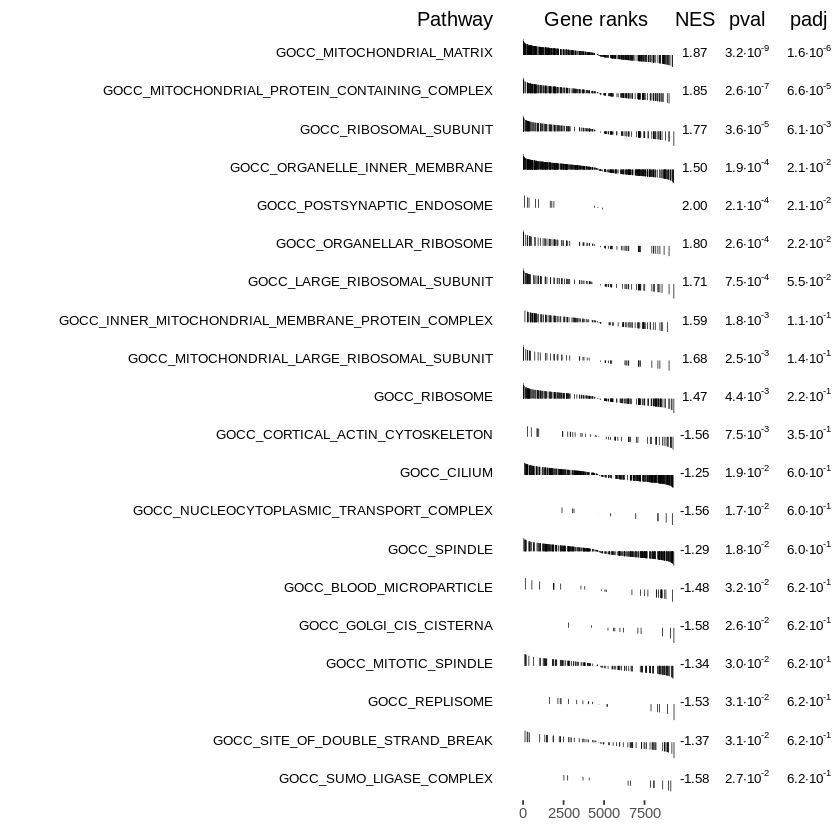

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



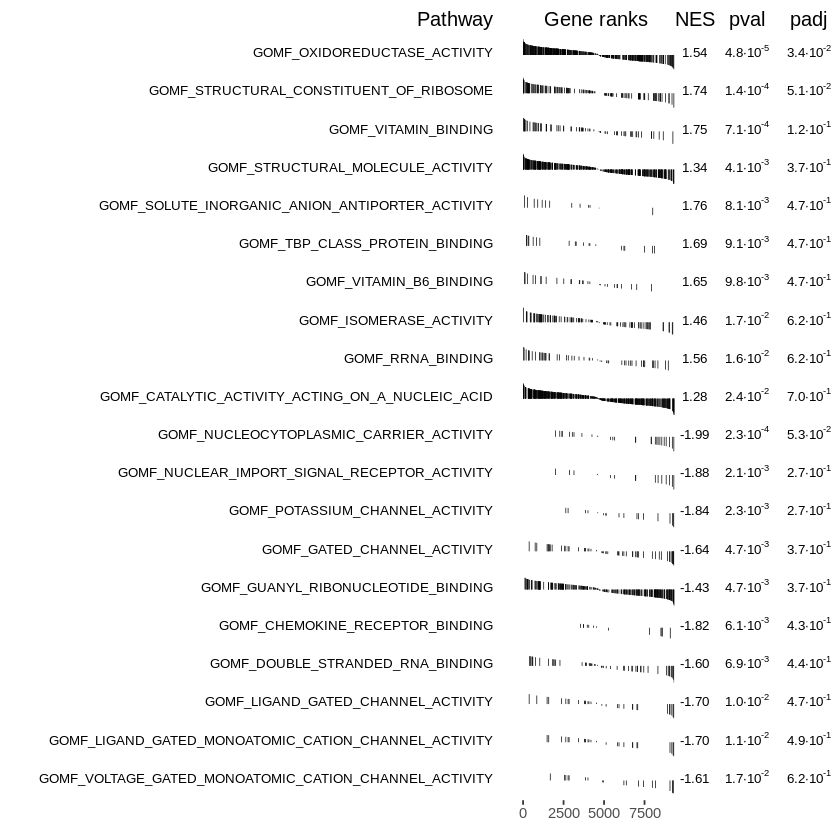

Saving 7 x 7 in image


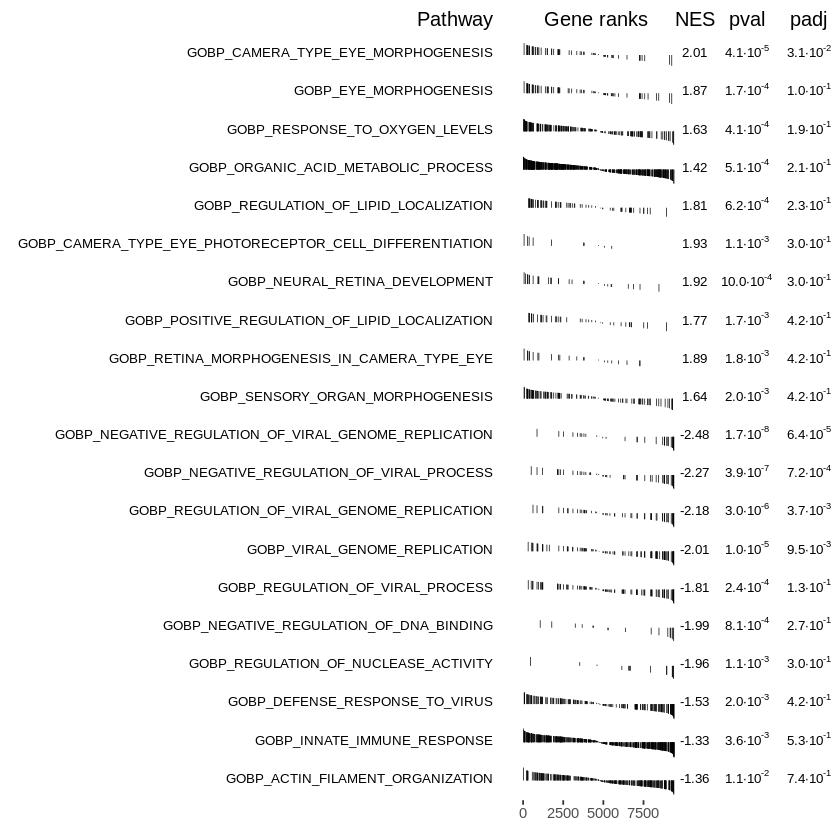

Saving 7 x 7 in image


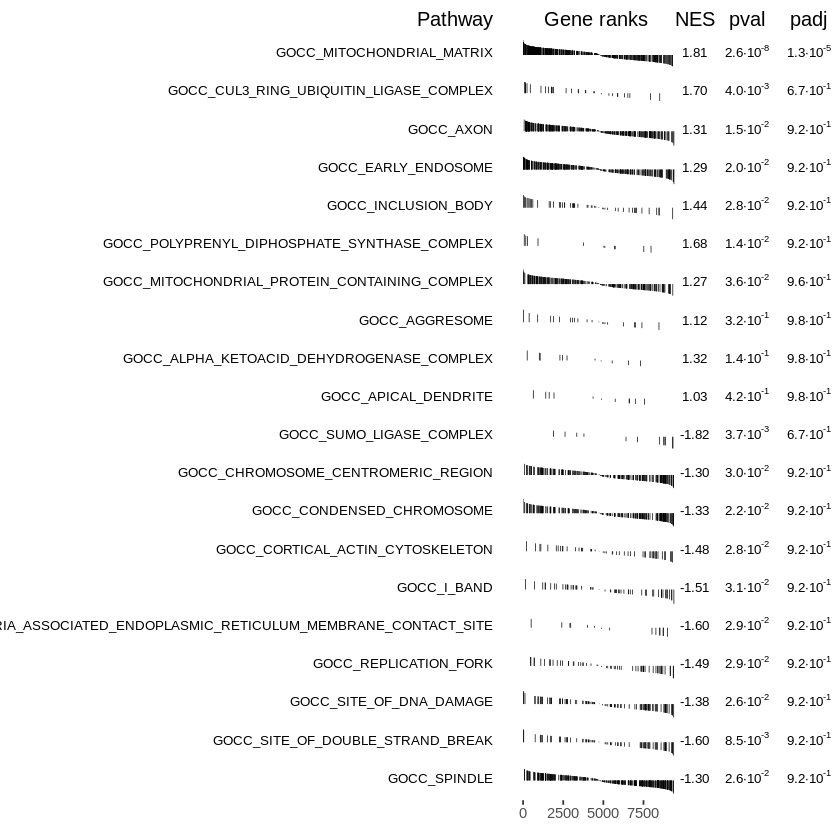

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



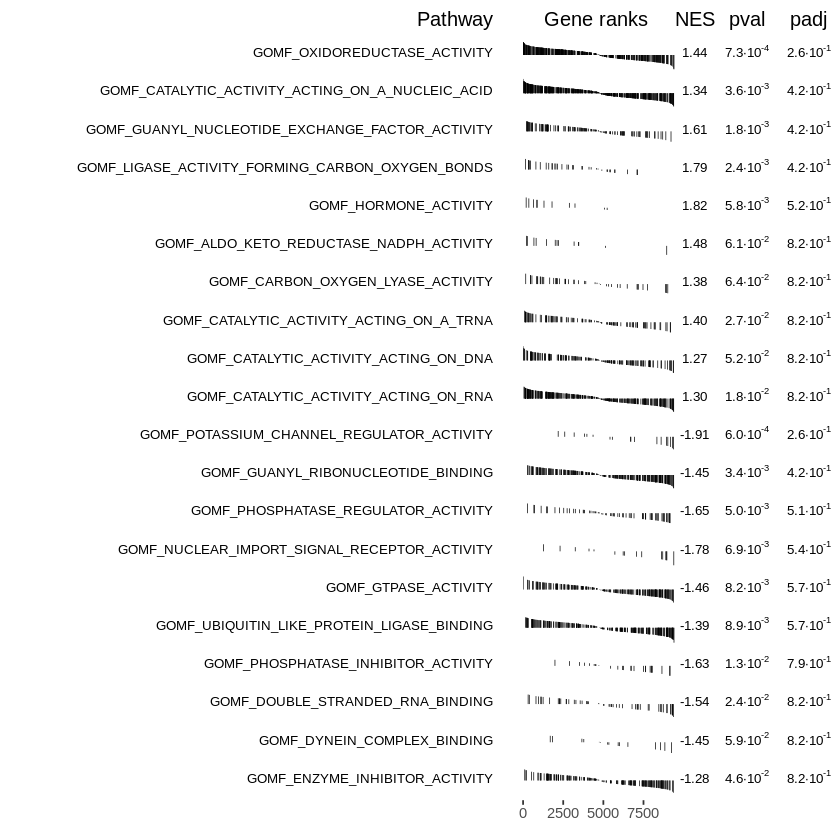

Saving 7 x 7 in image


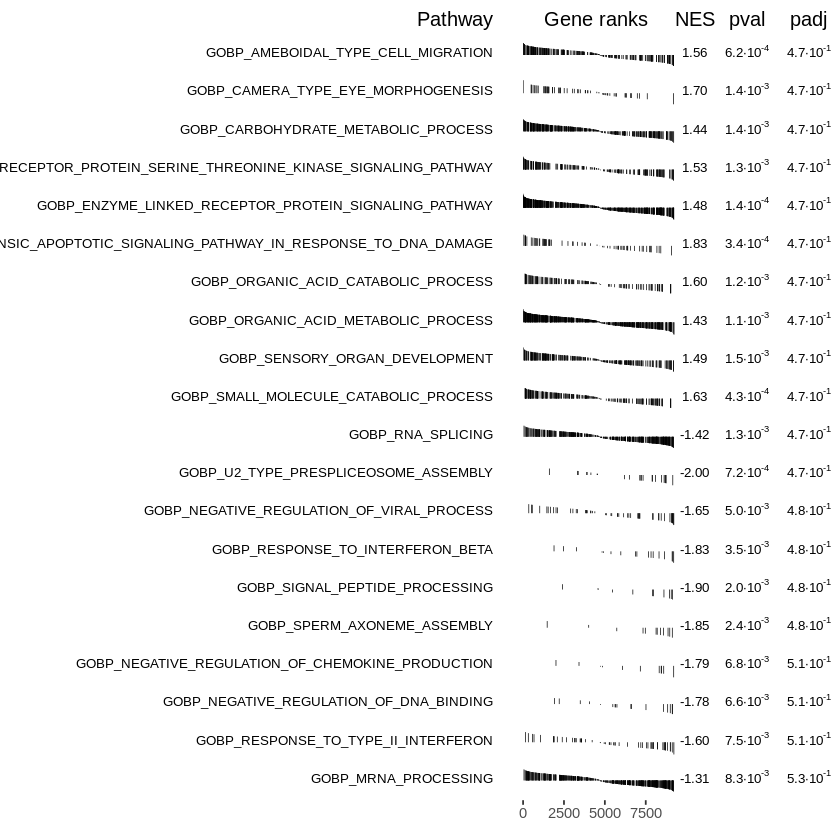

Saving 7 x 7 in image


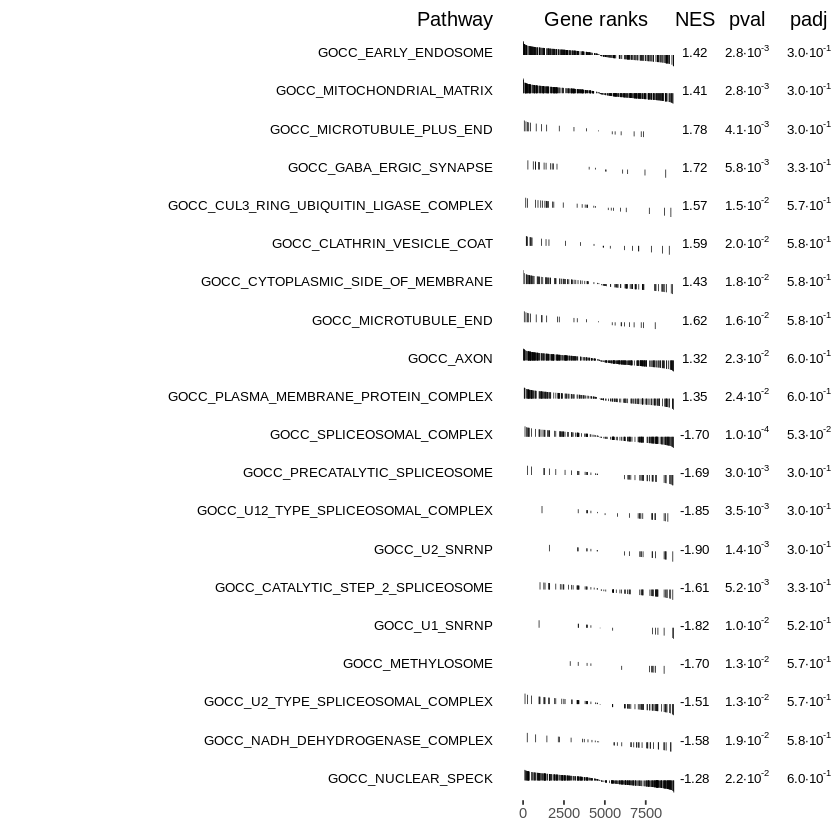

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



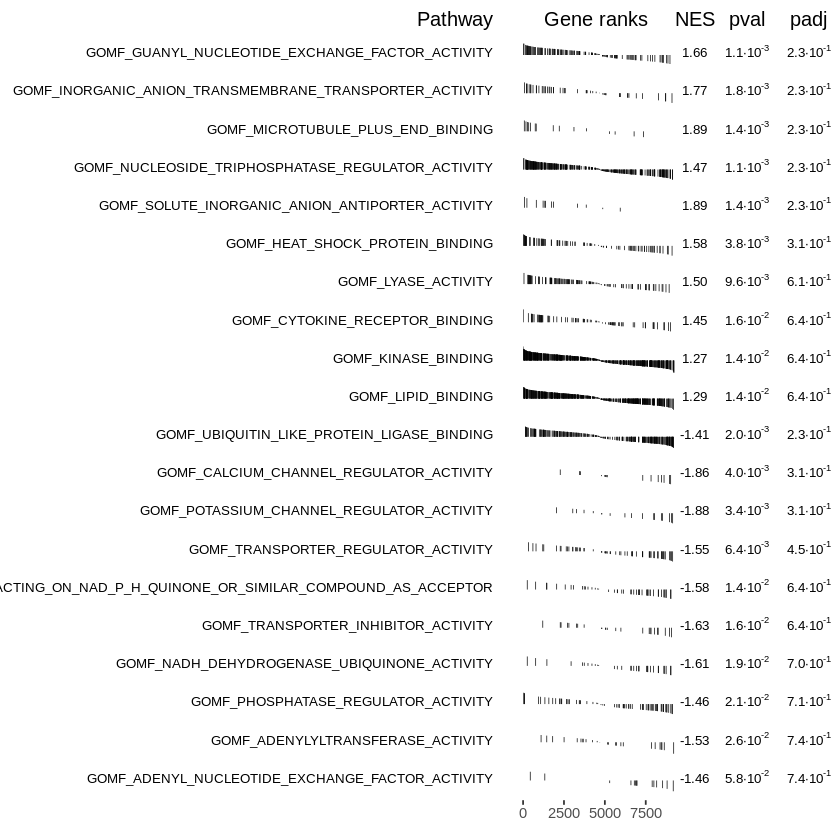

Saving 7 x 7 in image


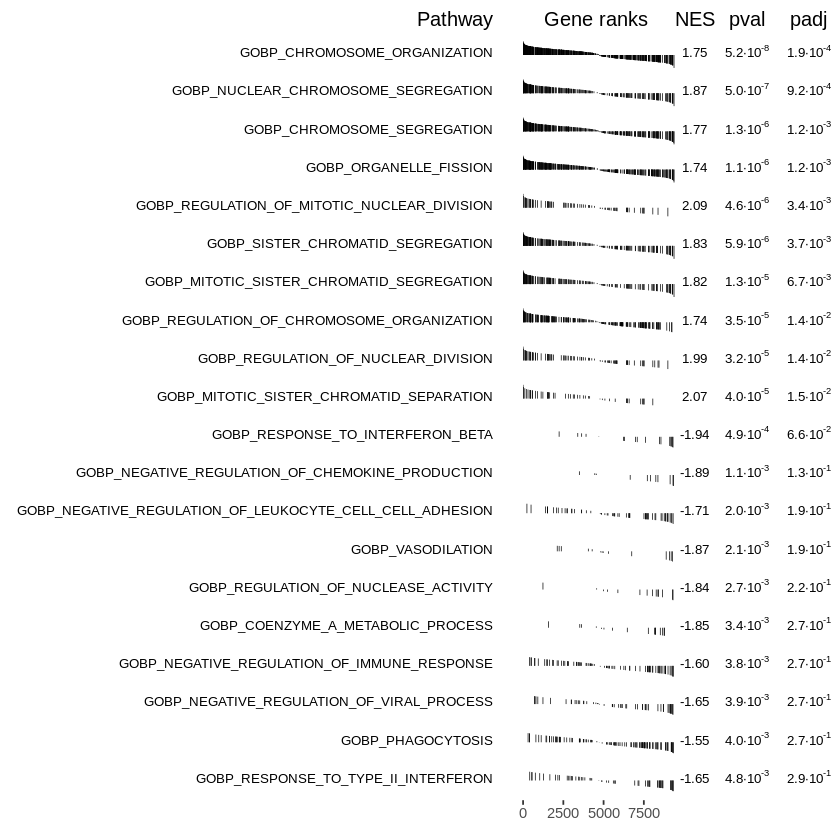

Saving 7 x 7 in image


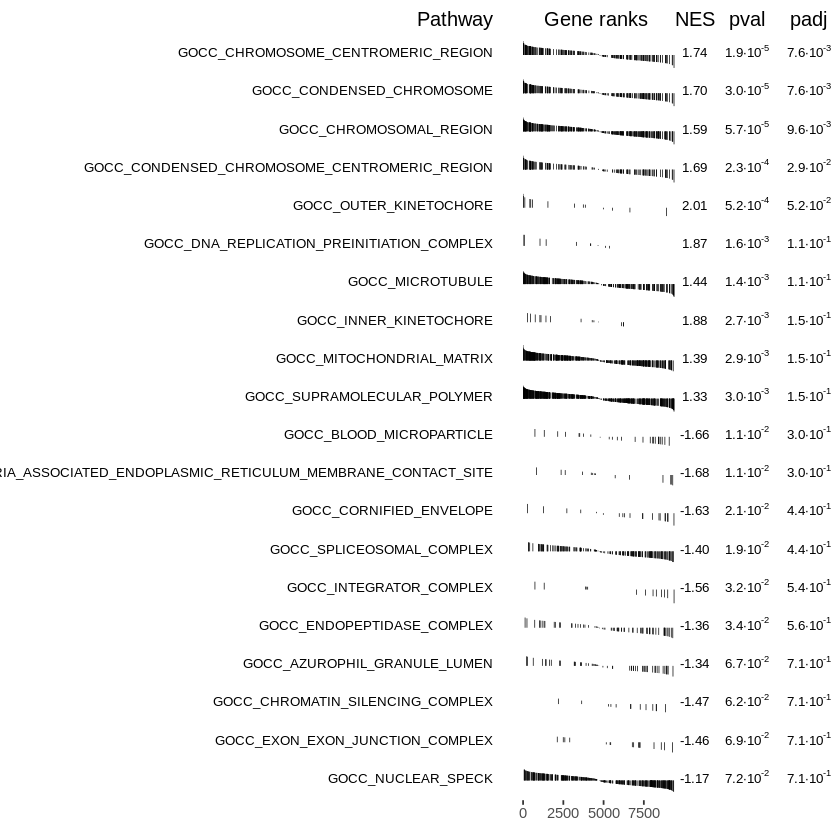

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



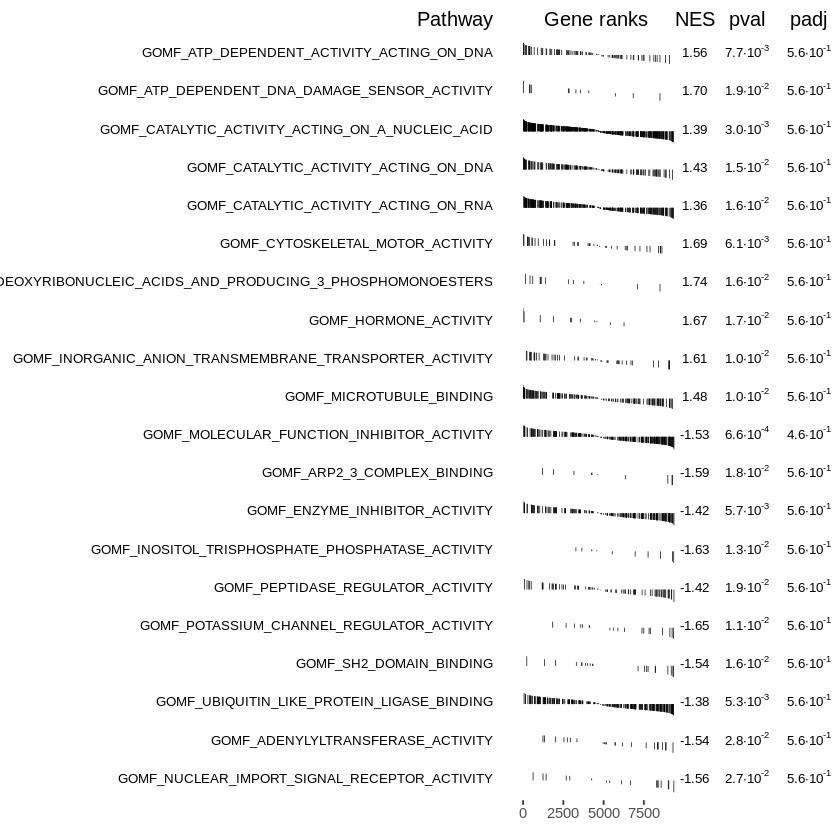

Saving 7 x 7 in image


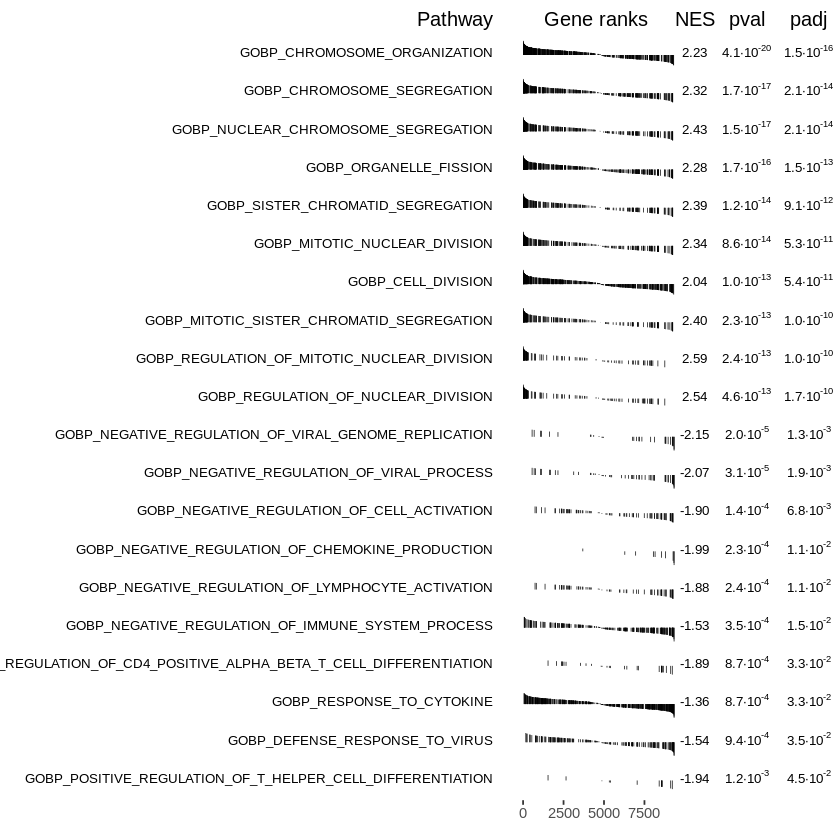

Saving 7 x 7 in image


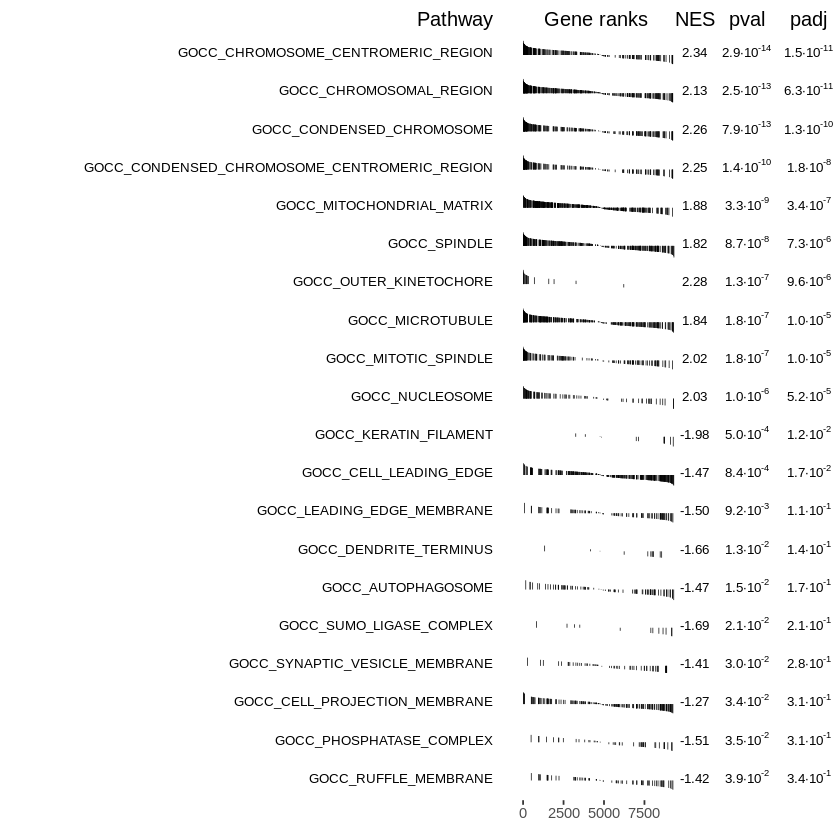

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



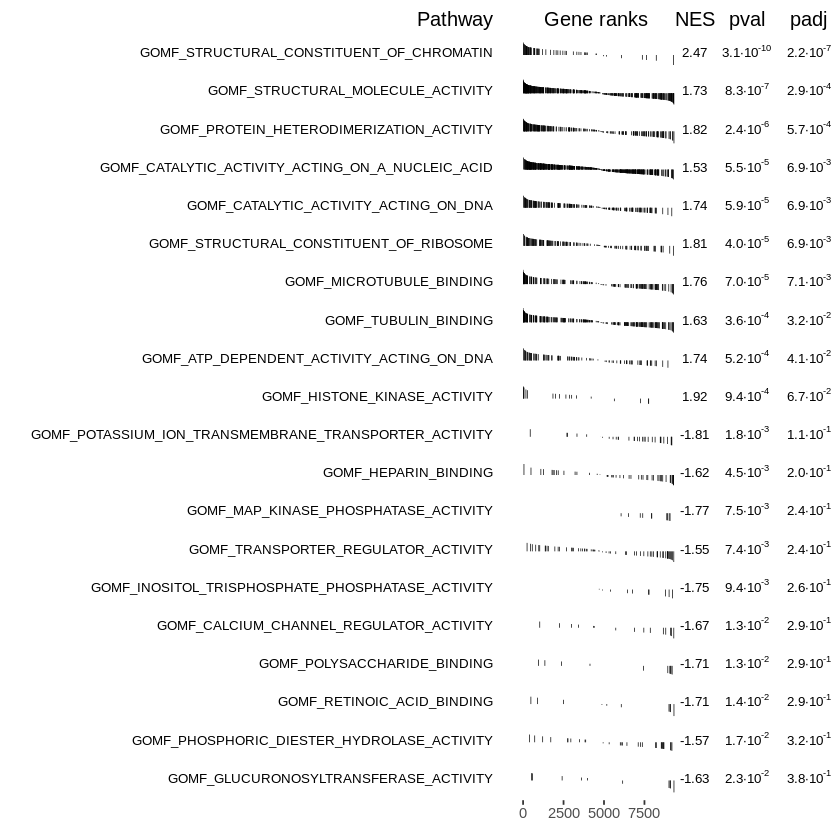

Saving 7 x 7 in image


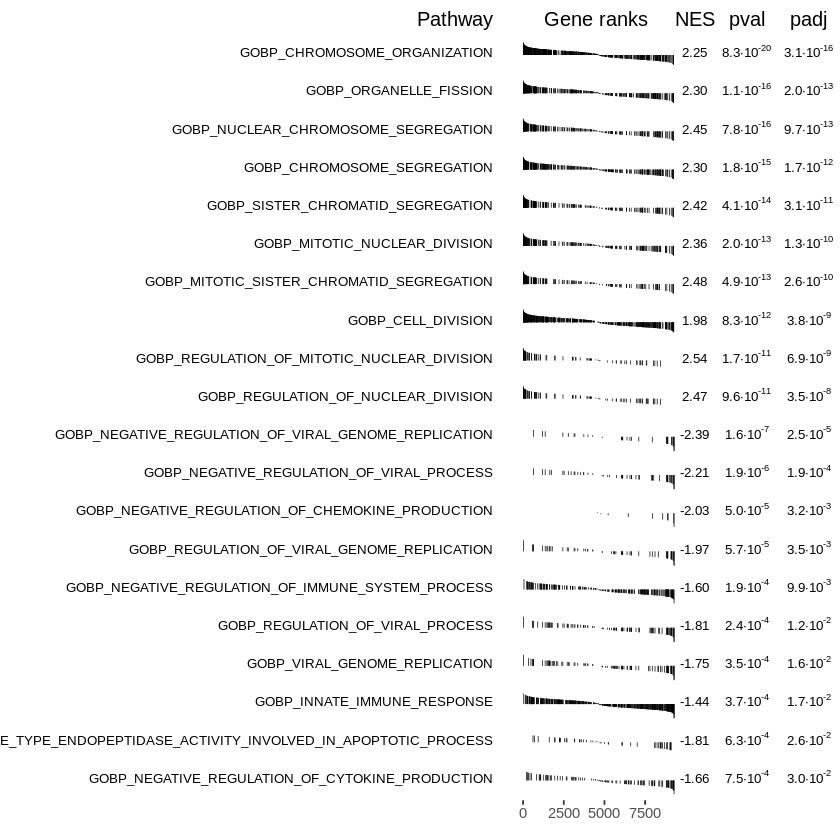

Saving 7 x 7 in image


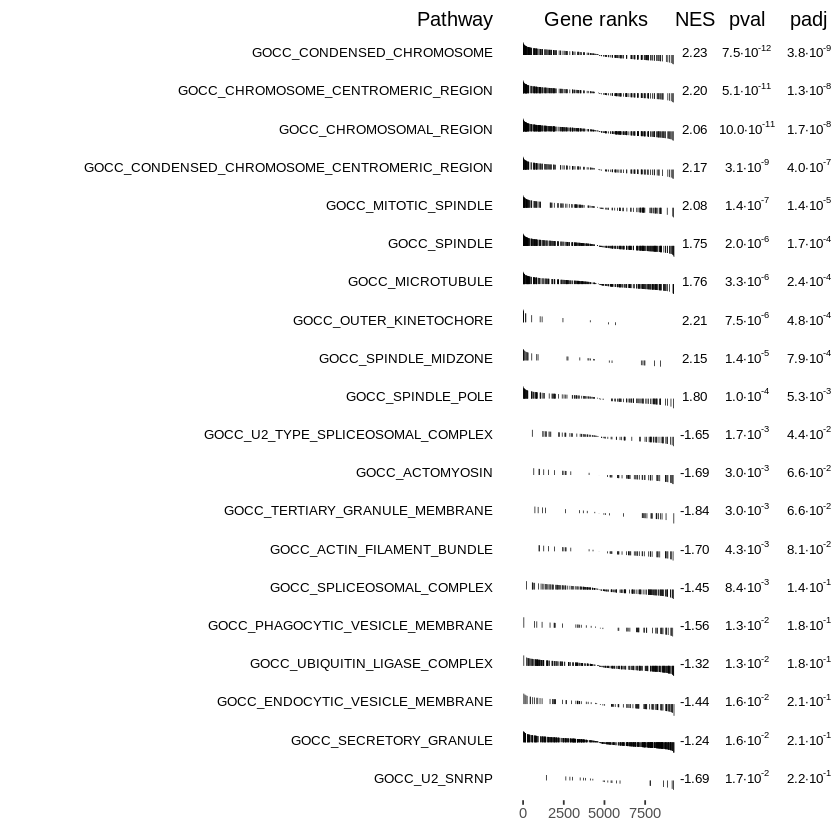

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



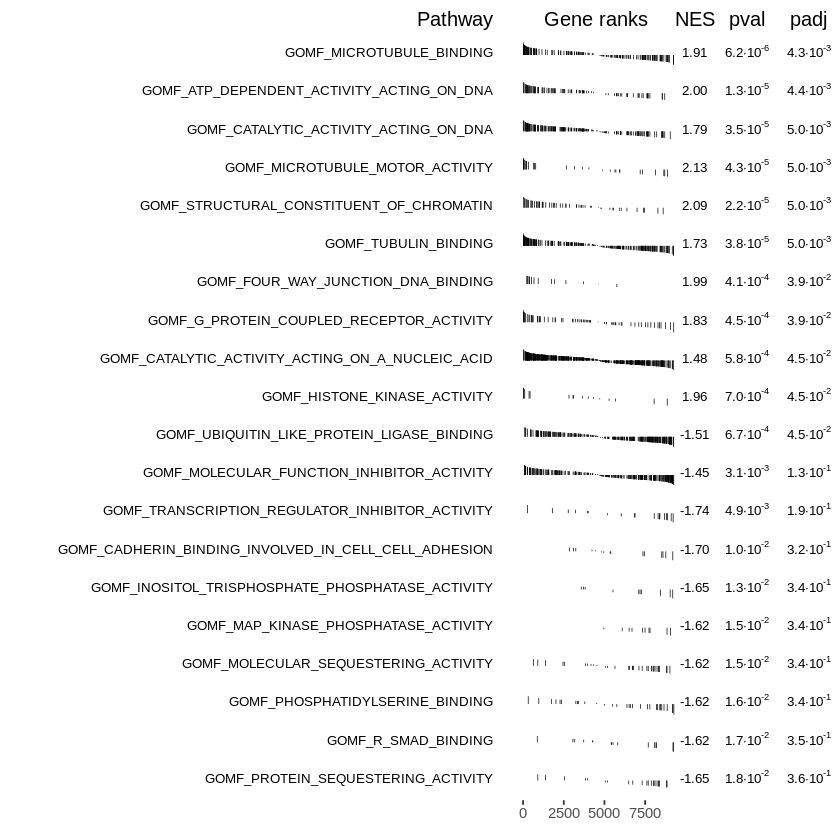

Saving 7 x 7 in image


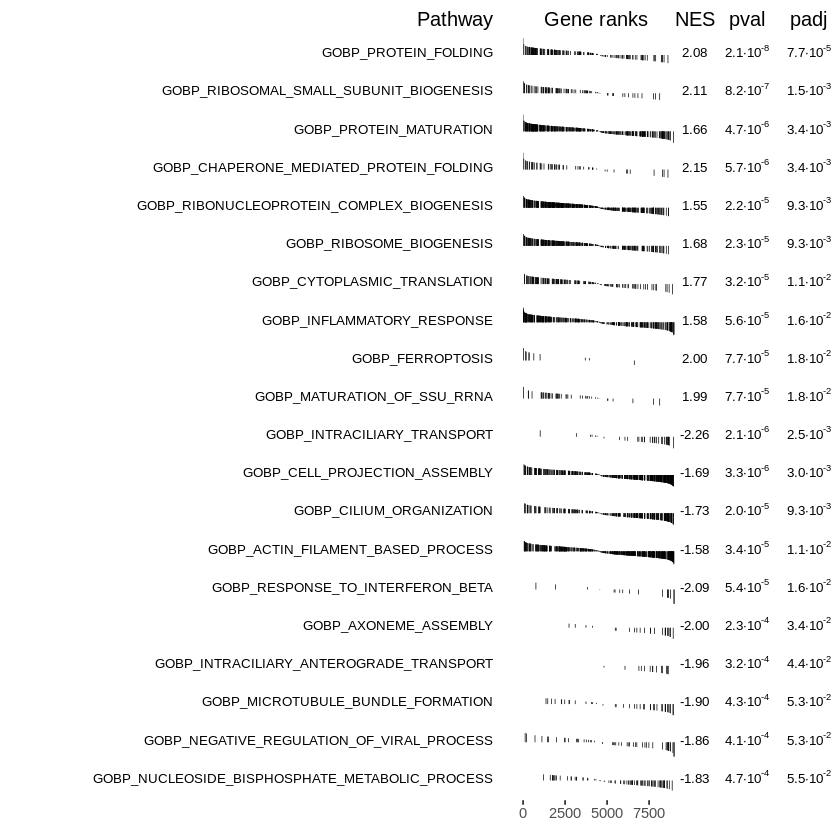

Saving 7 x 7 in image


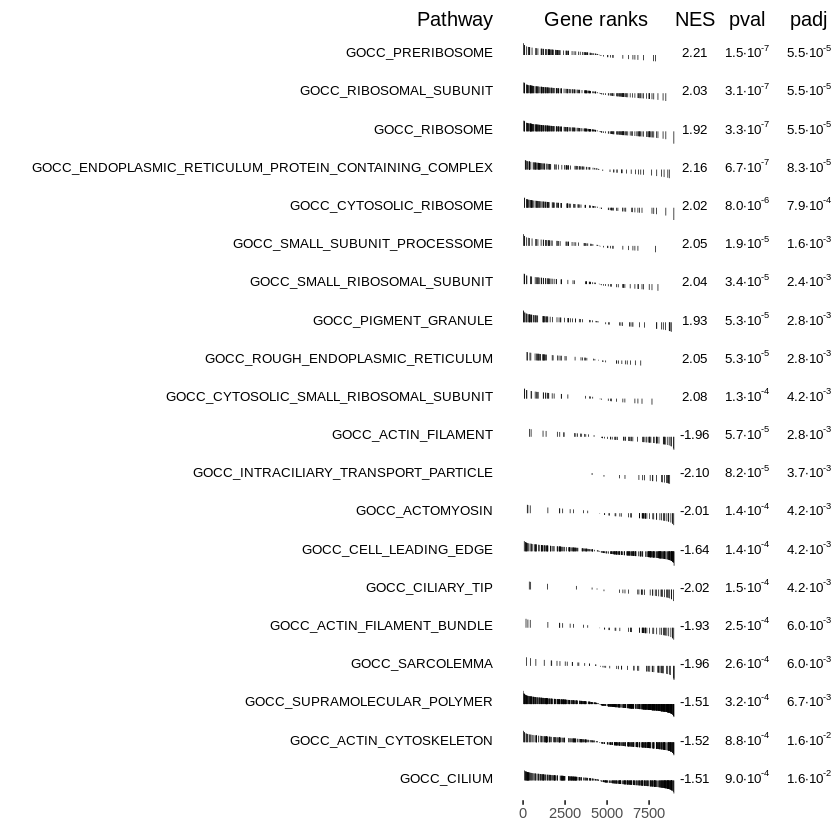

Saving 7 x 7 in image
'select()' returned 1:many mapping between keys and columns



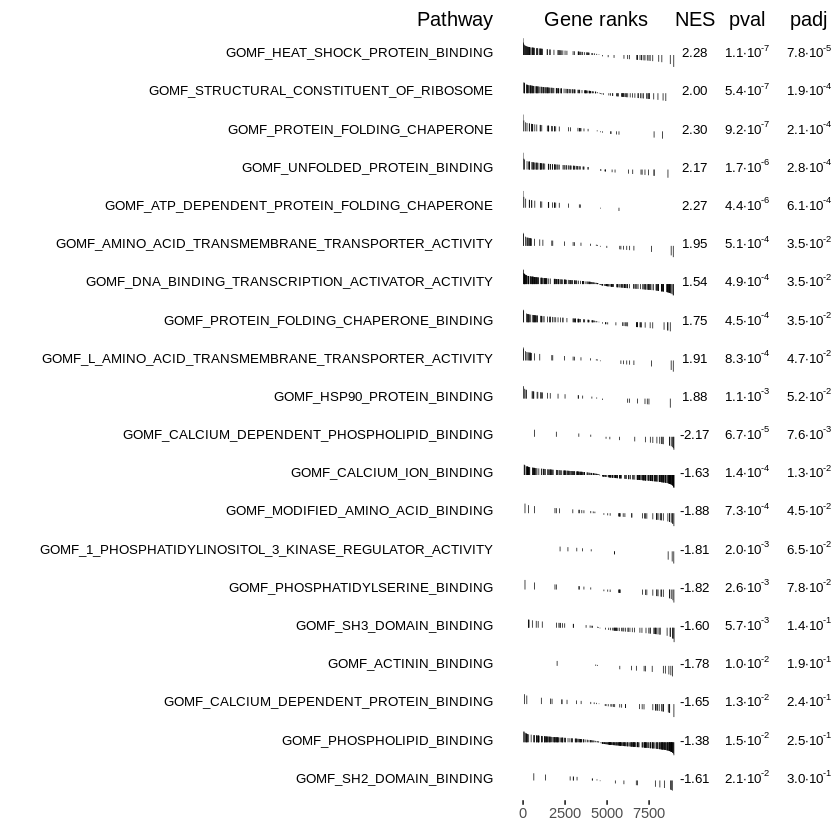

Saving 7 x 7 in image


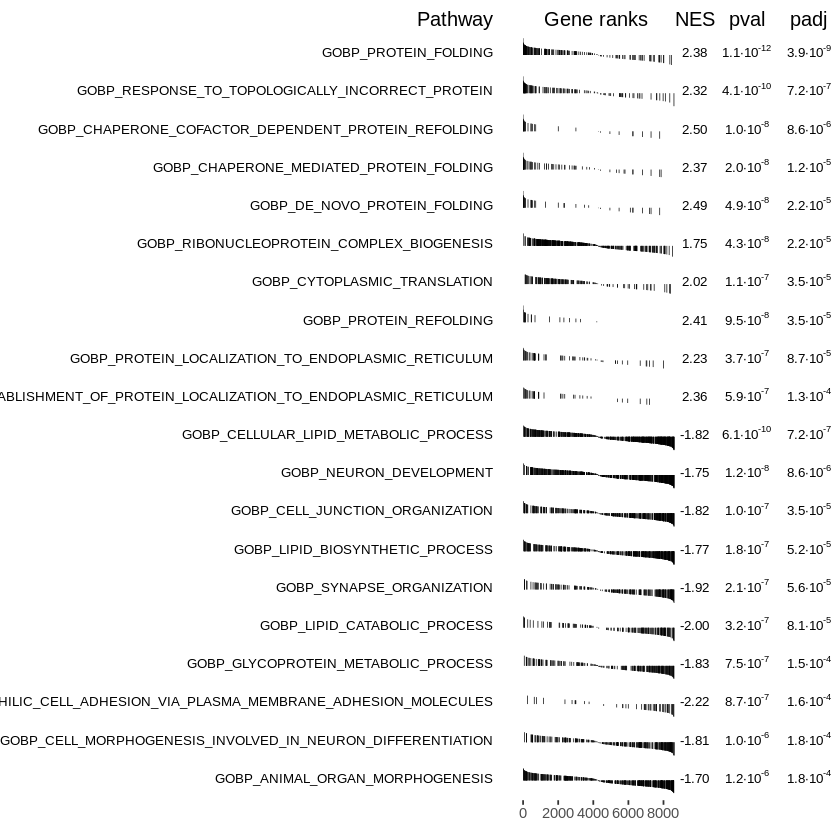

Saving 7 x 7 in image


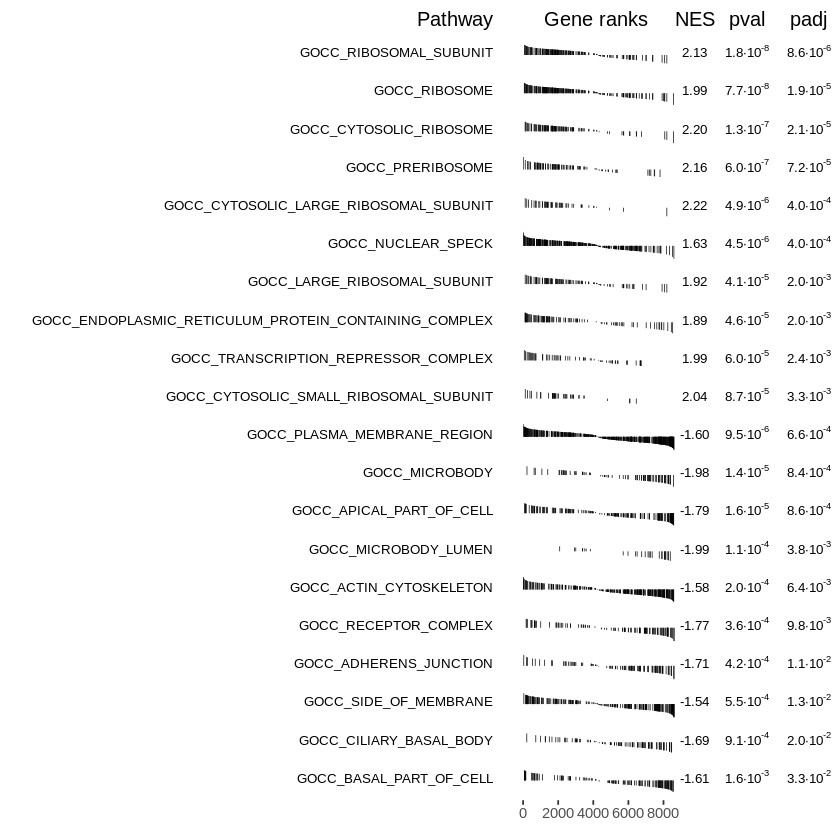

Saving 7 x 7 in image


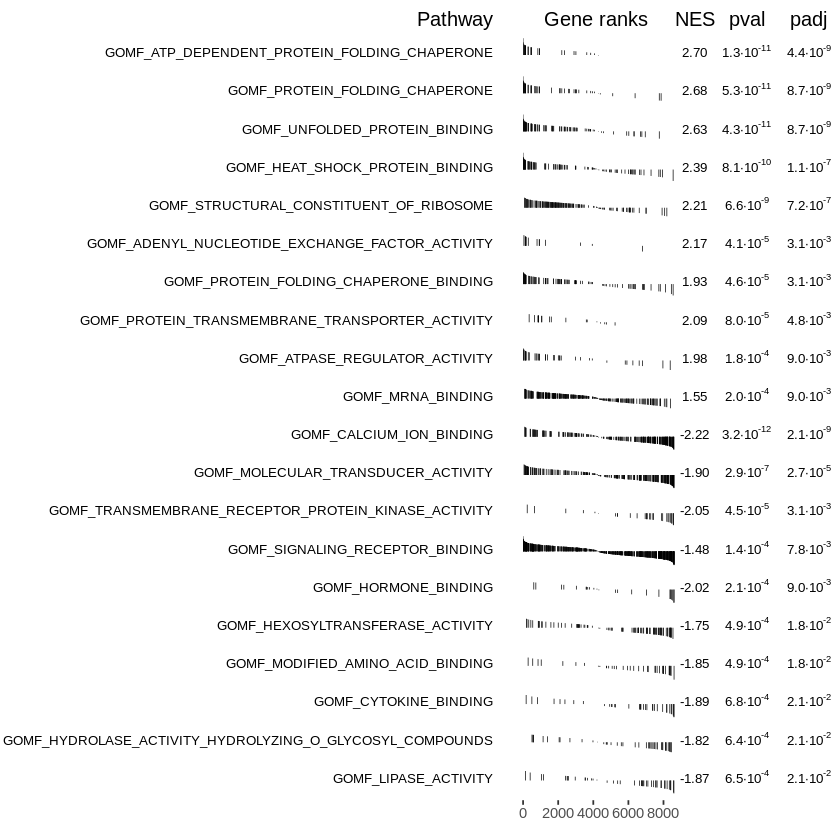

In [5]:
sig_pathway_counts <- list() # for counts of pathways (this is a list of dataframes)

sig_pathways_by_component <- list( # for common pathways
  "GO:BP" = list(),
  "GO:CC" = list(),
  "GO:MF" = list()
)

heatmap_data_list <- list() # for heatmaps

for (i in names(control_files)) {
  file <- control_files[[i]]
  my_stats <- get_stats(file)
  #print(my_stats)
  my_stats
  my_stats <- my_stats[!is.na(names(my_stats)) & is.finite(my_stats)] # remove NAs and infinite values

  score_type <- if (all(my_stats > 0)) "pos" else if (all(my_stats < 0)) "neg" else "std"

  for (j in subcategories) {
    pathway_genes <- get_pathway_genes(j)
    pathway_genes <- pathway_genes[lengths(pathway_genes) > 0]
    if (length(pathway_genes) == 0) {
    warning(paste("Genes missing for:", j))
    next}
    #my_stats <- my_stats[names(my_stats) %in% unlist(pathway_genes)]

    # if (length(my_stats) == 0) {
    #   warning(paste("Something is wrong in:", j))
    #   next
    # }
    res <- fgsea(
      pathways = pathway_genes,
      stats = my_stats,
      eps = 0.0,
      scoreType = score_type,
      minSize = 10,
      maxSize = 500
    )

    sig_count <- sum(res$padj < 0.05, na.rm = TRUE)
    sig_pathway_counts[[length(sig_pathway_counts) + 1]] <- data.frame(
    concentration = i,
    category = j,
    sig_count = sig_count)

    sig_pathways <- res[padj < 0.05, pathway]
    sig_pathways_by_component[[j]][[i]] <- sig_pathways

    #top 10 up and down pathways
    res_clean <- res[!is.na(padj)]
    topPathwaysUp <- res_clean[NES > 0][order(padj)][1:10, pathway]
    topPathwaysDown <- res_clean[NES < 0][order(padj)][1:10, pathway]
    topPathways <- unique(c(topPathwaysUp, topPathwaysDown))

    top_res <- res[pathway %in% topPathways, .(pathway, NES)]
    top_res$concentration <- i
    top_res$subcomponent <- j

    heatmap_data_list[[paste(i, j, sep = "_")]] <- top_res

    print(plotGseaTable(
      pathway_genes[topPathways],
      my_stats,
      res,
      gseaParam = 0.5,
      colwidths = c(10, 3, 0.8, 1.2, 1.2),
      pathwayLabelStyle = list(size = 8, color = "black"),
      valueStyle = list(size = 8)
    ))
    ggsave(paste(i,j, "top_and_bottom_pathways_fgsea_results.png", sep = "_"))
    #top_leading_edge_genes[, leadingEdge := sapply(leadingEdge, paste, collapse = ";")]
    #write.csv(top_leading_edge_genes, paste0(i, "_", j, "_leading_edge_genes.csv"), row.names = FALSE)
  }
}

CREATING STACKED GRAPHS  FOR DIFFERENTIALLY EXPRESSED PATHWAYS:

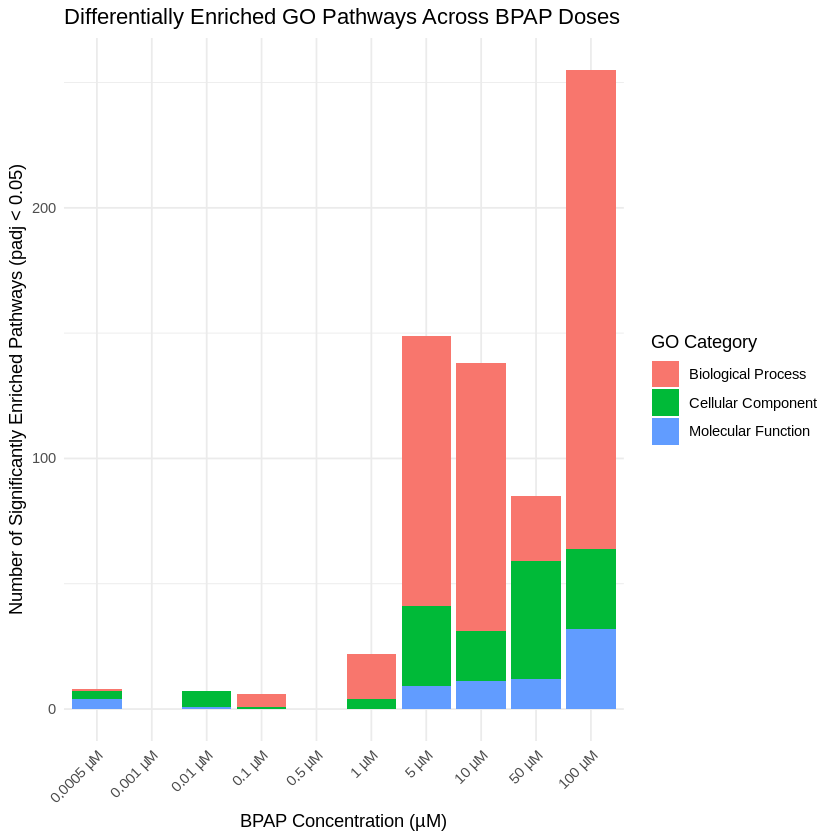

In [6]:
sig_df <- bind_rows(sig_pathway_counts)
sig_df$category <- factor(sig_df$category,
                          levels = c("GO:BP", "GO:CC", "GO:MF"),
                          labels = c("Biological Process", "Cellular Component", "Molecular Function"))
recode_map <- setNames(paste0(con_lis, " µM"), paste0(x, con_lis))
sig_df$concentration <- recode(sig_df$concentration, !!!recode_map)
sig_df$concentration <- factor(sig_df$concentration,
    levels = c("0.0005 µM", "0.001 µM", "0.01 µM", "0.1 µM", "0.5 µM", "1 µM", "5 µM", "10 µM", "50 µM", "100 µM"))
ggplot(sig_df, aes(x = concentration, y = sig_count, fill = category)) +
  geom_bar(stat = "identity") +
  labs(
    x = "BPAP Concentration (µM)",
    y = "Number of Significantly Enriched Pathways (padj < 0.05)",
    fill = "GO Category",
    title = "Differentially Enriched GO Pathways Across BPAP Doses"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Finding commmon pathways among all concentrations:

In [7]:
top3 <- c(paste0(x,"100"), paste0(x,"50"), paste0(x,"10"))

common_pathways <- lapply(sig_pathways_by_component, function(pathway_lists) {
  top_pathways_only <- pathway_lists[names(pathway_lists) %in% top3]
  Reduce(intersect, top_pathways_only)
})

print(common_pathways$`GO:BP`)
print(common_pathways$`GO:CC`)
print(common_pathways$`GO:MF`)

character(0)
character(0)
character(0)


COMPARING THE DATA WITH THE 50 GENE BIOMARKERS FOR ESTROGEN RESPONSE

'select()' returned 1:many mapping between keys and columns



               pathway       pval       padj   log2err         ES       NES
                <char>      <num>      <num>     <num>      <num>     <num>
1: Estrogen_Biomarkers 0.04604928 0.04604928 0.3217759 -0.4248637 -1.525096
    size  leadingEdge
   <int>       <list>
1:    38 PRSS23, ....
             Gene        Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.7558694231    1.3686 Downregulated          Upregulated
RET           RET  0.0989649131    1.6957   Upregulated          Upregulated
PGR           PGR -0.5418970884    1.3750 Downregulated          Upregulated
CXCL12     CXCL12  0.5434164317    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1 -0.0543747288    1.4629 Downregulated          Upregulated
CA12         CA12  0.2335990537    1.3283   Upregulated          Upregulated
MYB           MYB -0.0573357312    1.2700 Downregulated          Upregulated
AREG         AREG -0.4479206246    1.5957 Downregulated          Upregulated
RCL1         

'select()' returned 1:many mapping between keys and columns



               pathway      pval      padj    log2err         ES        NES
                <char>     <num>     <num>      <num>      <num>      <num>
1: Estrogen_Biomarkers 0.9215328 0.9215328 0.04522474 -0.1998739 -0.7245795
    size  leadingEdge
   <int>       <list>
1:    40 FOXC1, N....


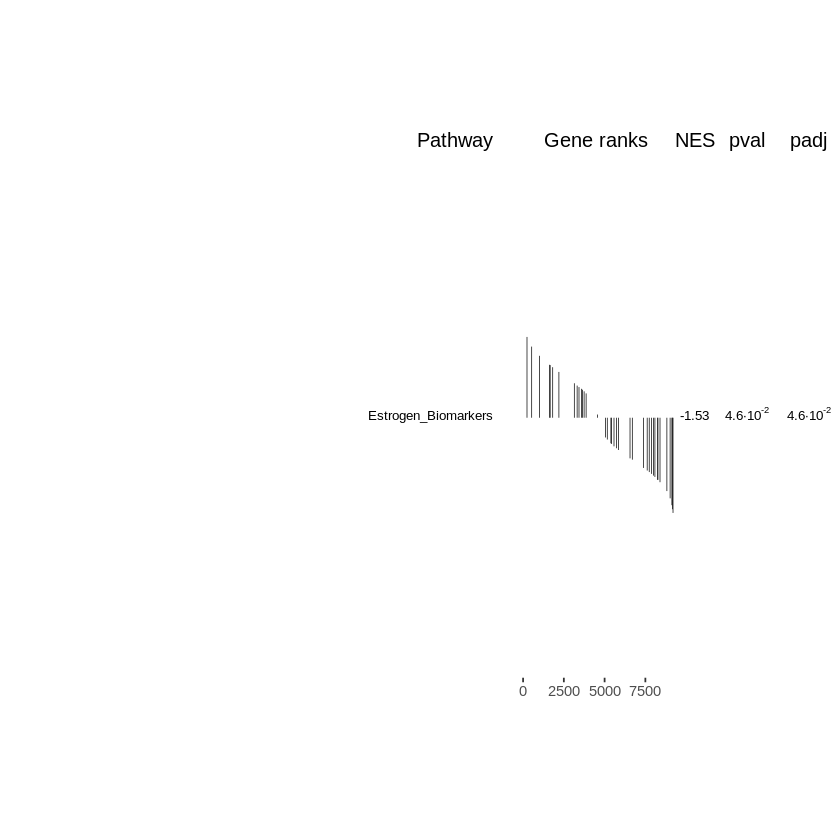

             Gene      Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.09190259    1.3686 Downregulated          Upregulated
RET           RET  0.31876328    1.6957   Upregulated          Upregulated
PGR           PGR -0.06679168    1.3750 Downregulated          Upregulated
CXCL12     CXCL12  0.12792902    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1  0.16707380    1.4629   Upregulated          Upregulated
CA12         CA12  0.16904857    1.3283   Upregulated          Upregulated
MYB           MYB  0.01267721    1.2700   Upregulated          Upregulated
AREG         AREG  0.02805424    1.5957   Upregulated          Upregulated
RCL1         RCL1  0.10986517    1.2917   Upregulated          Upregulated
CD44         CD44 -0.07373069    1.4567 Downregulated          Upregulated
EFNA1       EFNA1  0.19786387   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.27074758   -1.7650 Downregulated        Downregulated
EPHA4       EPHA4 -0.1661

'select()' returned 1:many mapping between keys and columns



               pathway       pval       padj   log2err         ES       NES
                <char>      <num>      <num>     <num>      <num>     <num>
1: Estrogen_Biomarkers 0.06102362 0.06102362 0.2572065 -0.3806535 -1.374183
    size  leadingEdge
   <int>       <list>
1:    39 FOXC1, N....


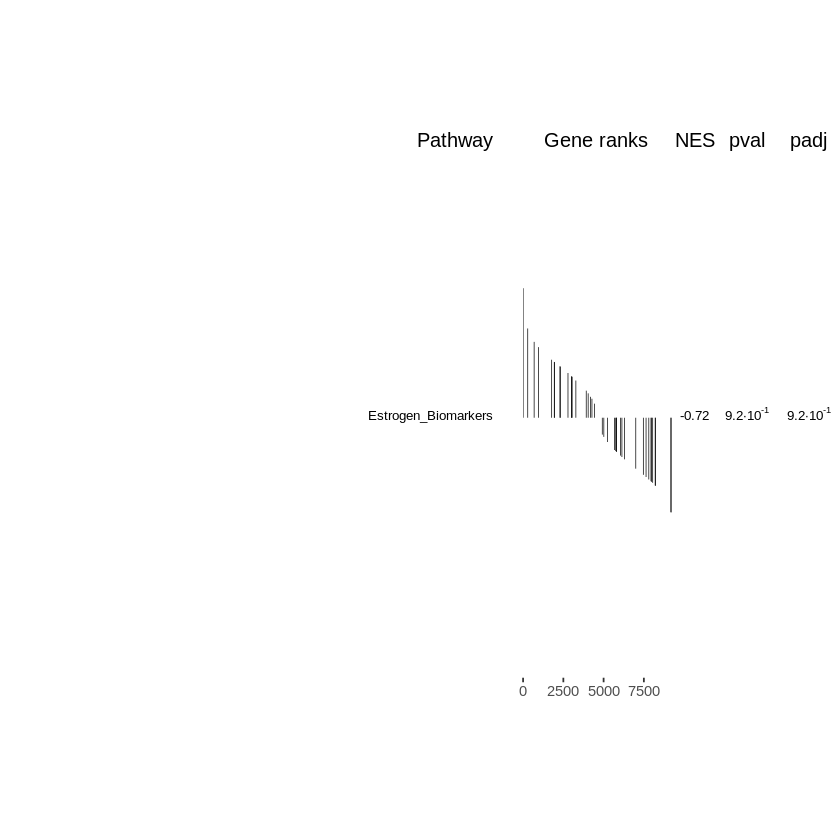

             Gene       Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.244043865    1.3686 Downregulated          Upregulated
RET           RET -0.057210151    1.6957 Downregulated          Upregulated
PGR           PGR -0.456795478    1.3750 Downregulated          Upregulated
CXCL12     CXCL12  0.019317835    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1 -0.186132870    1.4629 Downregulated          Upregulated
CA12         CA12  0.034097861    1.3283   Upregulated          Upregulated
MYB           MYB  0.001773567    1.2700   Upregulated          Upregulated
AREG         AREG -0.248704220    1.5957 Downregulated          Upregulated
RCL1         RCL1  0.202230208    1.2917   Upregulated          Upregulated
CD44         CD44 -0.189095872    1.4567 Downregulated          Upregulated
EFNA1       EFNA1  0.189578984   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.071247302   -1.7650 Downregulated        Downregulated
EPHA4       

'select()' returned 1:many mapping between keys and columns



               pathway       pval       padj   log2err         ES       NES
                <char>      <num>      <num>     <num>      <num>     <num>
1: Estrogen_Biomarkers 0.05846774 0.05846774 0.2663507 -0.3952374 -1.406115
    size  leadingEdge
   <int>       <list>
1:    40 PRSS23, ....


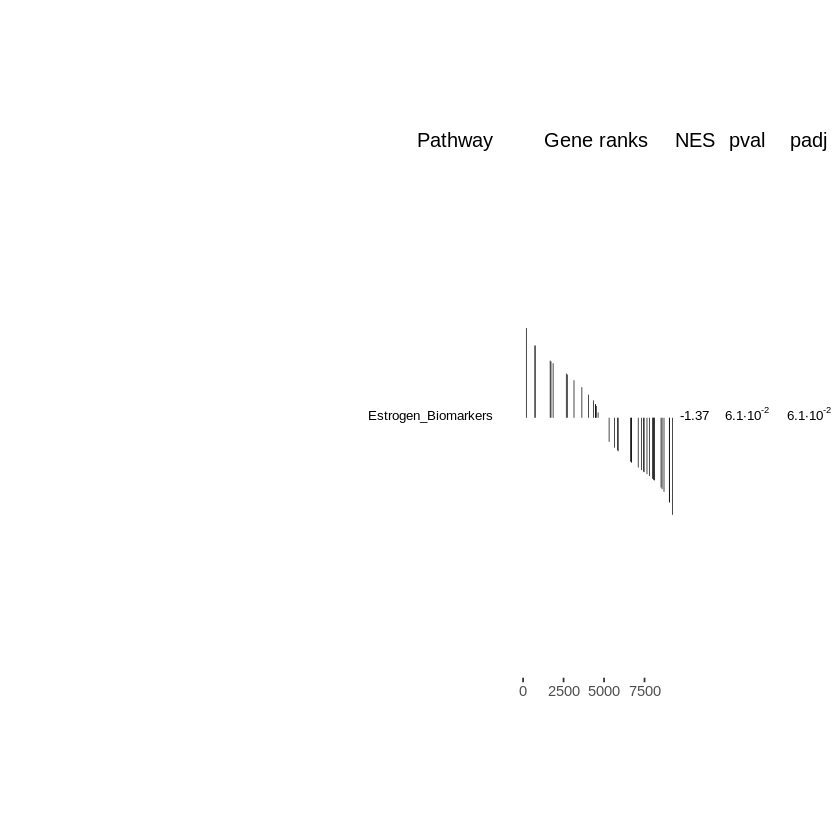

             Gene      Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.94649928    1.3686 Downregulated          Upregulated
RET           RET -0.27080654    1.6957 Downregulated          Upregulated
PGR           PGR -0.66422800    1.3750 Downregulated          Upregulated
CXCL12     CXCL12 -0.06328649    1.6200 Downregulated          Upregulated
RAPGEFL1 RAPGEFL1 -0.27561074    1.4629 Downregulated          Upregulated
CA12         CA12  0.14519366    1.3283   Upregulated          Upregulated
MYB           MYB -0.01103730    1.2700 Downregulated          Upregulated
AREG         AREG -0.06790951    1.5957 Downregulated          Upregulated
RCL1         RCL1  0.07679976    1.2917   Upregulated          Upregulated
CD44         CD44 -0.16323217    1.4567 Downregulated          Upregulated
EFNA1       EFNA1  0.16897445   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.16652324   -1.7650 Downregulated        Downregulated
EPHA4       EPHA4 -0.1848

'select()' returned 1:many mapping between keys and columns



               pathway      pval      padj   log2err         ES       NES  size
                <char>     <num>     <num>     <num>      <num>     <num> <int>
1: Estrogen_Biomarkers 0.2783019 0.2783019 0.1250334 -0.2989322 -1.111355    38
    leadingEdge
         <list>
1: NMRK1, S....


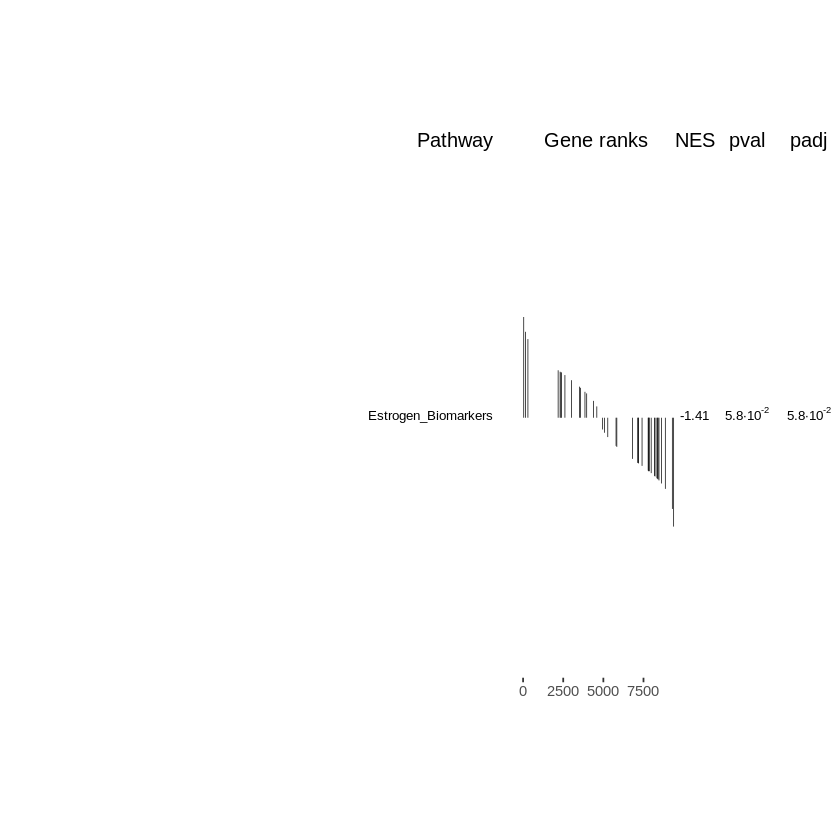

             Gene      Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.72149334    1.3686 Downregulated          Upregulated
RET           RET  0.71294638    1.6957   Upregulated          Upregulated
PGR           PGR  0.18709195    1.3750   Upregulated          Upregulated
CXCL12     CXCL12  0.19659314    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1  0.15635336    1.4629   Upregulated          Upregulated
CA12         CA12  0.07683826    1.3283   Upregulated          Upregulated
MYB           MYB  0.13213822    1.2700   Upregulated          Upregulated
AREG         AREG -0.45297094    1.5957 Downregulated          Upregulated
RCL1         RCL1  0.36779927    1.2917   Upregulated          Upregulated
CD44         CD44 -0.17639039    1.4567 Downregulated          Upregulated
EFNA1       EFNA1  0.45150194   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.20159216   -1.7650 Downregulated        Downregulated
TFPI         TFPI -0.2893

'select()' returned 1:many mapping between keys and columns



               pathway      pval      padj    log2err         ES        NES
                <char>     <num>     <num>      <num>      <num>      <num>
1: Estrogen_Biomarkers 0.5021186 0.5021186 0.08197788 -0.2684374 -0.9826712
    size  leadingEdge
   <int>       <list>
1:    39 FOXC1, P....


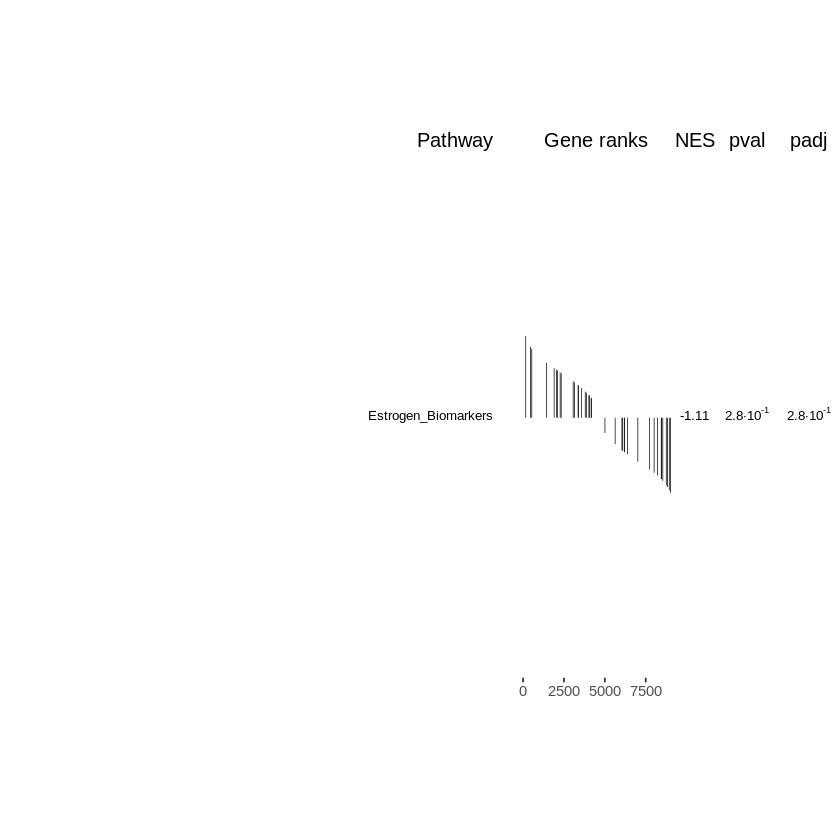

             Gene       Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.349477275    1.3686 Downregulated          Upregulated
PDZK1       PDZK1  0.295603403    1.4229   Upregulated          Upregulated
RET           RET  1.072842574    1.6957   Upregulated          Upregulated
PGR           PGR  0.423013365    1.3750   Upregulated          Upregulated
CXCL12     CXCL12  0.174741383    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1  0.605684744    1.4629   Upregulated          Upregulated
CA12         CA12  0.089008515    1.3283   Upregulated          Upregulated
MYB           MYB  0.556699033    1.2700   Upregulated          Upregulated
AREG         AREG -0.282148767    1.5957 Downregulated          Upregulated
RCL1         RCL1  0.284593807    1.2917   Upregulated          Upregulated
CD44         CD44  0.022304373    1.4567   Upregulated          Upregulated
EFNA1       EFNA1  0.223390374   -1.4800   Upregulated        Downregulated
CCNG2       

'select()' returned 1:many mapping between keys and columns



               pathway         pval         padj   log2err        ES      NES
                <char>        <num>        <num>     <num>     <num>    <num>
1: Estrogen_Biomarkers 9.913562e-05 9.913562e-05 0.5384341 0.6015568 2.018211
    size  leadingEdge
   <int>       <list>
1:    41 RET, PGR....


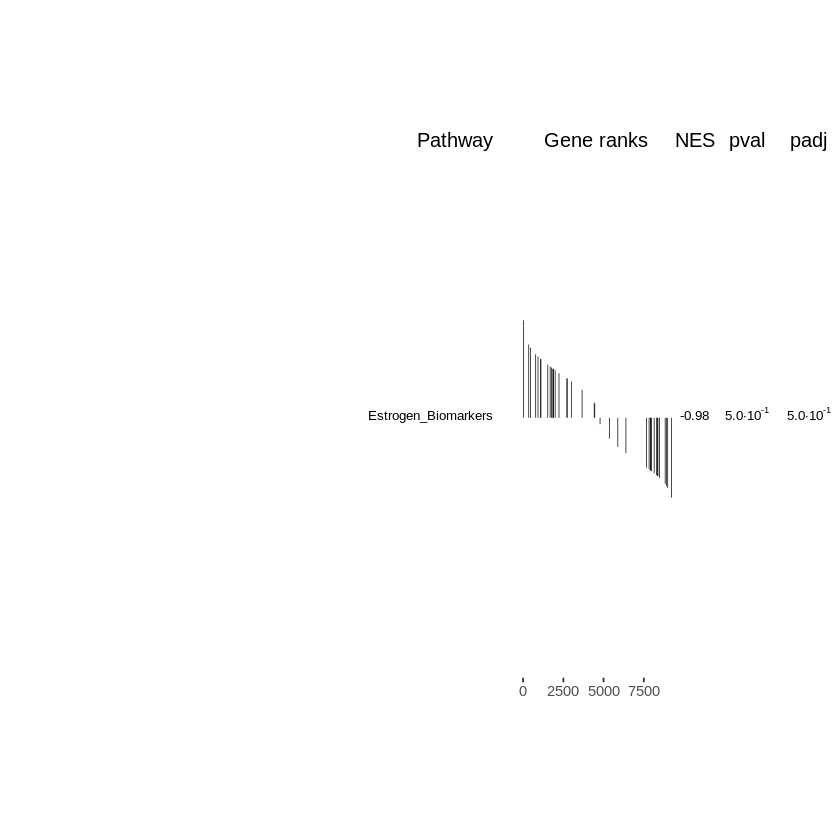

             Gene      Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23  0.36994231    1.3686   Upregulated          Upregulated
PDZK1       PDZK1  1.37328675    1.4229   Upregulated          Upregulated
RET           RET  2.16555865    1.6957   Upregulated          Upregulated
PGR           PGR  1.60918655    1.3750   Upregulated          Upregulated
CXCL12     CXCL12  0.98461961    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1  1.12408510    1.4629   Upregulated          Upregulated
CA12         CA12  0.27636254    1.3283   Upregulated          Upregulated
MYB           MYB  0.89318797    1.2700   Upregulated          Upregulated
AREG         AREG  0.94783983    1.5957   Upregulated          Upregulated
RCL1         RCL1  0.55448504    1.2917   Upregulated          Upregulated
CD44         CD44  0.39135382    1.4567   Upregulated          Upregulated
EFNA1       EFNA1 -0.04991809   -1.4800 Downregulated        Downregulated
CCNG2       CCNG2 -0.0698

'select()' returned 1:many mapping between keys and columns



               pathway        pval        padj   log2err        ES      NES
                <char>       <num>       <num>     <num>     <num>    <num>
1: Estrogen_Biomarkers 0.003102271 0.003102271 0.4317077 0.5085543 1.733502
    size  leadingEdge
   <int>       <list>
1:    41 RET, PGR....


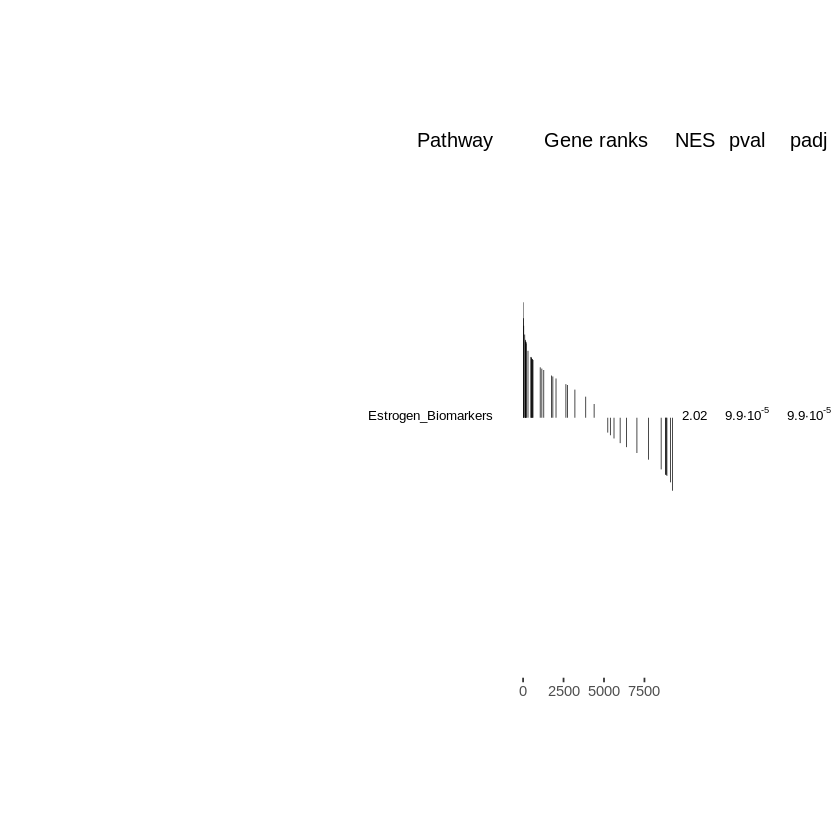

             Gene       Log2FC Reference    Regulation Reference_Regulation
PRSS23     PRSS23 -0.122690018    1.3686 Downregulated          Upregulated
PDZK1       PDZK1  1.562589621    1.4229   Upregulated          Upregulated
RET           RET  2.337454541    1.6957   Upregulated          Upregulated
PGR           PGR  2.121967229    1.3750   Upregulated          Upregulated
CXCL12     CXCL12  0.937830844    1.6200   Upregulated          Upregulated
RAPGEFL1 RAPGEFL1  1.655979035    1.4629   Upregulated          Upregulated
CA12         CA12  0.615699132    1.3283   Upregulated          Upregulated
MYB           MYB  1.073716981    1.2700   Upregulated          Upregulated
AREG         AREG  1.169804163    1.5957   Upregulated          Upregulated
RCL1         RCL1  0.246996362    1.2917   Upregulated          Upregulated
CD44         CD44  0.368969125    1.4567   Upregulated          Upregulated
EFNA1       EFNA1  0.015573989   -1.4800   Upregulated        Downregulated
CCNG2       

'select()' returned 1:many mapping between keys and columns



               pathway      pval      padj   log2err        ES      NES  size
                <char>     <num>     <num>     <num>     <num>    <num> <int>
1: Estrogen_Biomarkers 0.2540046 0.2540046 0.1294429 0.3291286 1.148707    37
    leadingEdge
         <list>
1: SLC7A5, ....


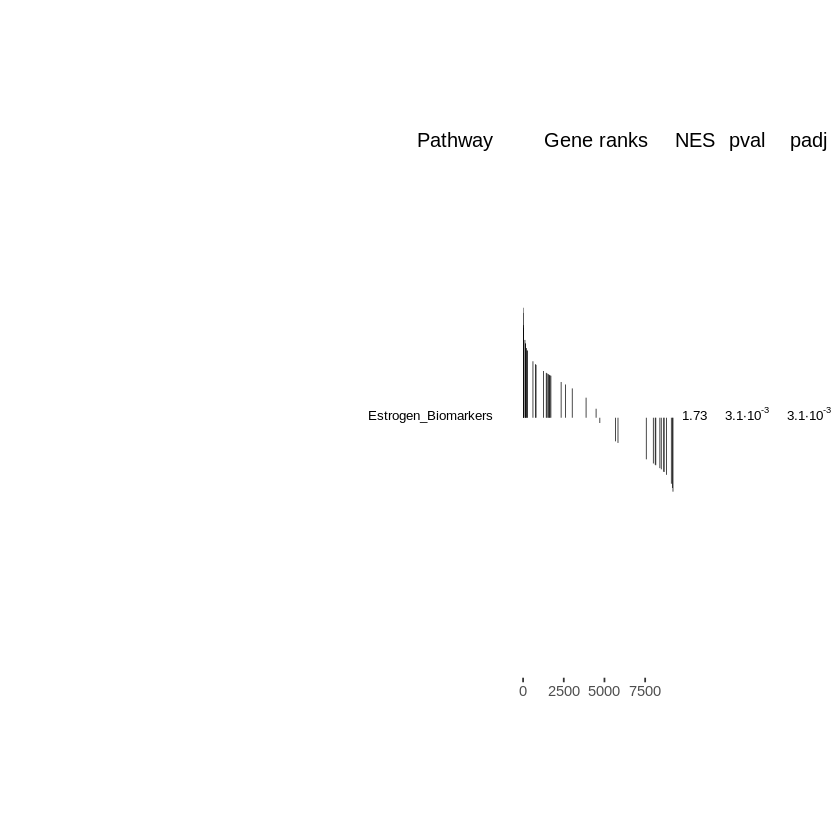

             Gene      Log2FC Reference    Regulation Reference_Regulation
RET           RET  0.23951112    1.6957   Upregulated          Upregulated
PGR           PGR -0.12738029    1.3750 Downregulated          Upregulated
CXCL12     CXCL12 -0.47955735    1.6200 Downregulated          Upregulated
RAPGEFL1 RAPGEFL1  0.20737937    1.4629   Upregulated          Upregulated
CA12         CA12  0.52672400    1.3283   Upregulated          Upregulated
MYB           MYB -0.84182143    1.2700 Downregulated          Upregulated
AREG         AREG  2.12522880    1.5957   Upregulated          Upregulated
RCL1         RCL1  0.37499815    1.2917   Upregulated          Upregulated
CD44         CD44  1.09934372    1.4567   Upregulated          Upregulated
EFNA1       EFNA1  0.08844991   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.18268829   -1.7650 Downregulated        Downregulated
EPHA4       EPHA4  0.38187112   -1.5171   Upregulated        Downregulated
TFPI         TFPI  0.1801

'select()' returned 1:many mapping between keys and columns



               pathway      pval      padj   log2err         ES      NES  size
                <char>     <num>     <num>     <num>      <num>    <num> <int>
1: Estrogen_Biomarkers 0.2084746 0.2084746 0.1221079 -0.3710176 -1.19849    32
    leadingEdge
         <list>
1: MYB, ALA....


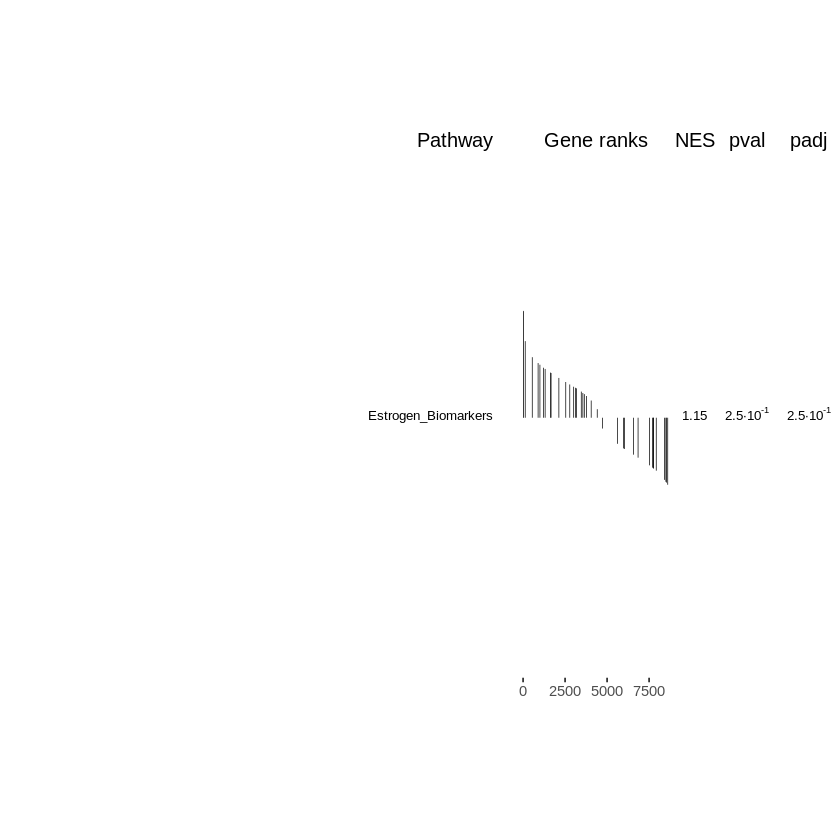

             Gene      Log2FC Reference    Regulation Reference_Regulation
PGR           PGR -0.84345401    1.3750 Downregulated          Upregulated
RAPGEFL1 RAPGEFL1  0.05803207    1.4629   Upregulated          Upregulated
CA12         CA12 -1.84109888    1.3283 Downregulated          Upregulated
MYB           MYB -3.13015325    1.2700 Downregulated          Upregulated
AREG         AREG  0.38002235    1.5957   Upregulated          Upregulated
RCL1         RCL1  0.64245282    1.2917   Upregulated          Upregulated
CD44         CD44  1.19196474    1.4567   Upregulated          Upregulated
EFNA1       EFNA1  0.31593813   -1.4800   Upregulated        Downregulated
CCNG2       CCNG2 -0.92074427   -1.7650 Downregulated        Downregulated
TFAP2A     TFAP2A -0.58435276   -1.4817 Downregulated        Downregulated
CLMN         CLMN -1.38886100   -1.4450 Downregulated        Downregulated
PLEKHF2   PLEKHF2  0.15188110   -1.4450   Upregulated        Downregulated
ID3           ID3 -0.1495

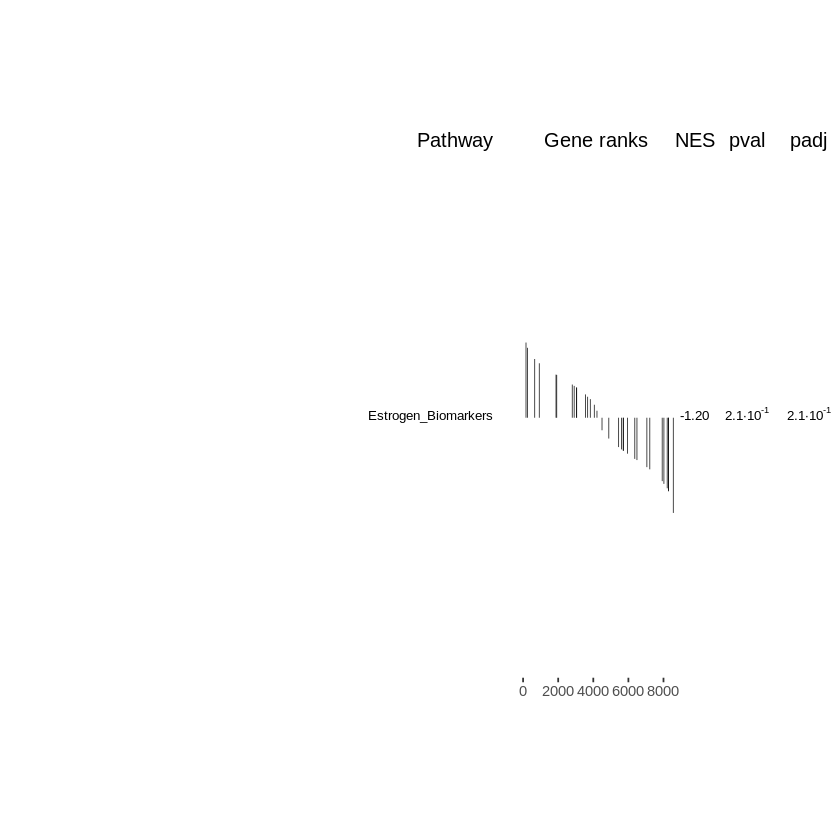

pdf 
  3

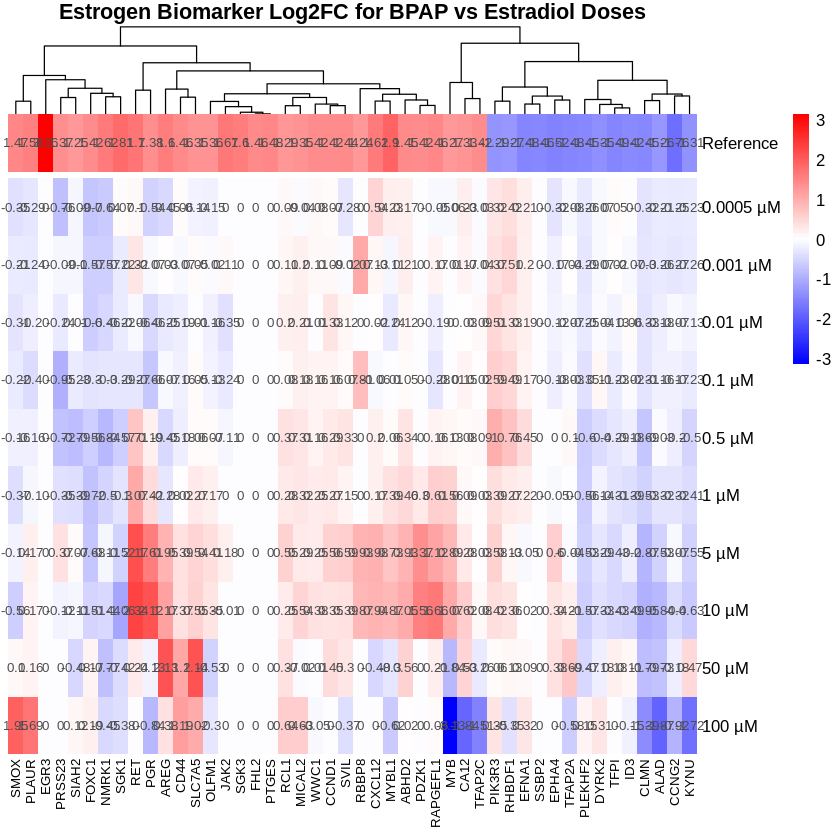

In [8]:
file <- read.csv("/content/biomarkers.csv")
biomarker_df <- file[!is.na(file$Fold.change.in.the.46.gene.ER.Biomarker), ]
biomarker_genes <- biomarker_df$Gene
reference_fc <- biomarker_df$Fold.change.in.the.46.gene.ER.Biomarker
names(reference_fc) <- biomarker_genes
biomarker_gene_set <- list("Estrogen_Biomarkers" = biomarker_genes)
lfc_matrix <- data.frame(Gene = biomarker_genes)
for (i in names(control_files)) {
  file <- control_files[[i]]
  stats <- get_stats(file)
  stats <- sort(stats, decreasing = TRUE)
  stats <- stats[!is.na(names(stats)) & is.finite(stats)]
  estrogen_res <- fgsea(pathways = biomarker_gene_set, stats = stats, scoreType = "std", minSize = 1, maxSize = 500)
  print(estrogen_res)
  topPathwaysUp <- estrogen_res[ES > 0][head(order(pval), n = 10), pathway]
  topPathwaysDown <- estrogen_res[ES < 0][head(order(pval), n = 10), pathway]
  topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
  print(plotGseaTable(
    biomarker_gene_set[topPathways],
    stats,
    estrogen_res,
    gseaParam = 0.5,
    colwidths = c(10, 3, 0.8, 1.2, 1.2),
    pathwayLabelStyle = list(size = 8, color = "black"),
    valueStyle = list(size = 8)
  ))
  common_genes <- intersect(biomarker_genes, names(stats))
  estrogen_gene_stats <- data.frame(
    Gene                = common_genes,
    Log2FC              = stats[common_genes],
    Reference           = reference_fc[common_genes],
    Regulation          = ifelse(stats[common_genes] > 0, "Upregulated", "Downregulated"),
    Reference_Regulation = ifelse(reference_fc[common_genes] > 0, "Upregulated", "Downregulated")
  )
  print(estrogen_gene_stats)
  match_up <- sum(estrogen_gene_stats$Reference_Regulation == "Upregulated" & estrogen_gene_stats$Regulation == "Upregulated")
  match_down <- sum(estrogen_gene_stats$Reference_Regulation == "Downregulated" & estrogen_gene_stats$Regulation == "Downregulated")
  total_up <- sum(estrogen_gene_stats$Reference_Regulation == "Upregulated")
  total_down <- sum(estrogen_gene_stats$Reference_Regulation == "Downregulated")
  cat("Upregulated match:", match_up, "out of", total_up, "\n")
  cat("Downregulated match:", match_down, "out of", total_down, "\n")
  temp_df <- data.frame(Gene = common_genes, log2FC = stats[common_genes])
  colnames(temp_df)[2] <- i
  lfc_matrix <- full_join(lfc_matrix, temp_df, by = "Gene")
}

lfc_matrix$Reference <- reference_fc[lfc_matrix$Gene]
rownames(lfc_matrix) <- lfc_matrix$Gene
lfc_matrix <- lfc_matrix[, -1]
recode_map <- setNames(paste0(con_lis, " µM"), paste0(x, con_lis))
lfc_matrix <- lfc_matrix %>%
  rename_with(~ recode(., !!!recode_map))
ordered_cols <- c("Reference", "0.0005 µM", "0.001 µM", "0.01 µM", "0.1 µM", "0.5 µM", "1 µM", "5 µM", "10 µM", "50 µM", "100 µM")
lfc_matrix <- lfc_matrix[, intersect(ordered_cols, colnames(lfc_matrix))]
lfc_matrix[!is.finite(as.matrix(lfc_matrix))] <- 0
lfc_matrix_t <- t(lfc_matrix)
n_genes <- ncol(lfc_matrix_t)
n_conditions <- nrow(lfc_matrix_t)
cell_width <- 0.4
cell_height <- 0.4
pdf("BPAP_biomarker_heatmap.pdf", width = 12, height = 8)
pheatmap(
  mat = lfc_matrix_t,
  cluster_rows = FALSE,
  cluster_cols = TRUE,
  display_numbers = round(lfc_matrix_t, 2),
  main = "Estrogen Biomarker Log2FC for BPAP vs Estradiol Doses",
  fontsize_col = 8,
  fontsize_row = 10,
  angle_col = 90,
  color = colorRampPalette(c("blue", "white", "red"))(200),
  na_col = "grey90",
  gaps_row = 1,
  border_color = NA
)
dev.off()

In [9]:
write.csv(lfc_matrix_t,file=paste0(x,"_estroBiomarker_Mat.csv"))